In this study, a combination of virtual and structure-based screening approaches to repurpose approved drugs from the ZINC database as potential inhibitors of HDAC3. Molecular dynamics simulations were performed to confirm the stability of these compounds following molecular docking.

Part 1: Setup Google Drive Environment and Load Data

In [4]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Data: https://drive.google.com/file/d/1tD6h9RuDgub5Z1F347Vm7Lao3z5gG7u6/view?usp=drive_link

This data contains 576 HDAC3 inhibitors from CHEMBL database which includes experimental data on their biological activities.
The FASTA sequence of the target protein (PDB I.D. 4A69) was retrieved from the Protein Data Bank (PDB) and used to source these inhibitors from the ChEMBL database (https://www.ebi.ac.uk/chembl/). Each of these inhibitors is identified by a unique ChEMBL I.D., a corresponding SMILES notation, and the value of the negative logarithm of the half-maximal inhibitory concentration (pIC50 value).

In [6]:
file_id = '1tD6h9RuDgub5Z1F347Vm7Lao3z5gG7u6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('chembl_hdac_inhibitors.csv')

# Read the CSV file
import numpy as np
import pandas as pd

df = pd.read_csv('chembl_hdac_inhibitors.csv', delimiter= ",")
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL356769,TUBACIN,NaN,721.88,2,8.62,tubacin,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,IC50,'=',...,PROTEIN COMPLEX,CHEMBL2417402,1.0,Scientific Literature,J Med Chem,2013.0,NaN,NaN,NaN,NaN
1,CHEMBL3605494,NaN,NaN,386.46,0,3.74,(S)-15b,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,IC50,'=',...,PROTEIN COMPLEX,CHEMBL3603817,1.0,Scientific Literature,J Med Chem,2015.0,NaN,NaN,NaN,NaN
2,CHEMBL4090647,NaN,NaN,425.53,0,3.13,4k,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,IC50,'=',...,PROTEIN COMPLEX,CHEMBL4014348,1.0,Scientific Literature,J Med Chem,2017.0,NaN,NaN,NaN,NaN
3,CHEMBL3098602,NaN,NaN,458.44,0,1.86,28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL2018451,NaN,NaN,335.41,0,2.80,19,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,IC50,'=',...,PROTEIN COMPLEX,CHEMBL4385610,1.0,Scientific Literature,J Med Chem,2019.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,CHEMBL5281887,NaN,NaN,378.50,0,4.75,47,Cc1onc(-c2ccccc2)c1/C=C/c1ccc(CNC(=O)C(C)S)cc1,IC50,'>',...,PROTEIN COMPLEX,CHEMBL5226279,1.0,Scientific Literature,Eur J Med Chem,2021.0,NaN,TIME_Lower = 125.0 min | TIME_Upper = 130.0 min,NaN,NaN
573,CHEMBL5186622,NaN,NaN,407.87,0,3.40,9a,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,'=',...,PROTEIN COMPLEX,CHEMBL5154702,1.0,Scientific Literature,Bioorg Med Chem,2022.0,NaN,TIME = 0.5 hr,INHIBITOR,NaN
574,CHEMBL4526892,NaN,NaN,337.42,0,2.66,5,CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1,IC50,'=',...,PROTEIN COMPLEX,CHEMBL5126568,1.0,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,TIME = 1.5 hr,INHIBITOR,NaN
575,CHEMBL5178597,NaN,NaN,421.89,0,3.79,9b,CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,'=',...,PROTEIN COMPLEX,CHEMBL5154702,1.0,Scientific Literature,Bioorg Med Chem,2022.0,NaN,TIME = 0.5 hr,INHIBITOR,NaN


Part 2: Data Preprocessing

In [7]:
df_new = df[['Molecule ChEMBL ID','Smiles', 'pChEMBL Value']]

In [8]:
df_new

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL356769,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,5.90
1,CHEMBL3605494,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,7.40
2,CHEMBL4090647,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,7.58
3,CHEMBL3098602,NaN,NaN
4,CHEMBL2018451,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,5.40
...,...,...,...
572,CHEMBL5281887,Cc1onc(-c2ccccc2)c1/C=C/c1ccc(CNC(=O)C(C)S)cc1,NaN
573,CHEMBL5186622,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.75
574,CHEMBL4526892,CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1,8.11
575,CHEMBL5178597,CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.97


# Part 2: Data Preprocessing
Data preprocessing is a crucial step in the machine learning pipeline. It involves cleaning and transforming raw data into a format that is suitable for building and training machine learning models. Preprocessing helps to ensure the quality and integrity of the data, making the subsequent analysis more accurate and reliable.

Deal with Missing Value
To understand the structure of our dataset and identify any missing values, we use the info() method. This method provides a concise summary of the DataFrame, including the number of non-null entries in each column, the data type of each column.

We can remove any rows that contain missing values using the dropna() method. This method drops all rows with any missing values by default. By setting the parameter inplace=True, we modify the DataFrame data in place.

In [9]:
df_new.info

<bound method DataFrame.info of     Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL356769  O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...   
1        CHEMBL3605494  Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...   
2        CHEMBL4090647  Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...   
3        CHEMBL3098602                                                NaN   
4        CHEMBL2018451         CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1   
..                 ...                                                ...   
572      CHEMBL5281887     Cc1onc(-c2ccccc2)c1/C=C/c1ccc(CNC(=O)C(C)S)cc1   
573      CHEMBL5186622      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1   
574      CHEMBL4526892           CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1   
575      CHEMBL5178597     CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1   
576      CHEMBL5194067  O=C1NC(=O)/C(=C\c2ccc(OCC(=O)N3N=C(c4ccccc4)CC...   

     pChEMBL Value  
0             5.90  
1             7.40  
2             7.58  
3              NaN  
4             5.40  
..             ...  
572            NaN  
573           5.75  
574           8.11  
575           5.97  
576           5.04  

[577 rows x 3 columns]>

In [10]:
df_new = df_new.dropna()

In [11]:
df_new = df_new.reset_index()

In [12]:
df_new = df_new.drop(columns=['index'])

In [13]:
df_new

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL356769,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,5.90
1,CHEMBL3605494,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,7.40
2,CHEMBL4090647,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,7.58
3,CHEMBL2018451,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,5.40
4,CHEMBL4531802,O=C(NO)c1ccc(Cn2c3c(c4ccccc42)COCC3)cc1,5.90
...,...,...,...
478,CHEMBL5194529,COc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccc(C(=O)Nc4cccc...,6.23
479,CHEMBL5186622,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.75
480,CHEMBL4526892,CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1,8.11
481,CHEMBL5178597,CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.97


In [14]:
#** Categorizing compounds based on their activity**
#If the value is less than 6.5, it's considered a "Weak Inhibitor".
#This function then returns the appropriate label ("Strong Inhibitor" or "Weak Inhibitor")

def activity(s):
    if s >= 6.5:
        return "Strong Inhibitor"
    else:
        return "Weak Inhibitor"

In [16]:
#Install the rdkit package using pip install rdkit-pypi to import and use the rdkit module
#for working with chemical structures and descriptors.
!pip install rdkit-pypi
import numpy as np
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 56.7 MB/s eta 0:00:00


In [17]:
#classifying the molecules in the dataset into "Strong Inhibitors" or "Weak Inhibitors"
#based on their pChEMBL Value, and recording this classification in a new column

df_new['activity'] = df_new['pChEMBL Value'].apply(activity)

In [19]:
#Create a RDkit molecule instance for each smiles
df_new['Molecule'] = df_new['Smiles'].apply(Chem.MolFromSmiles)

df_new

,Molecule ChEMBL ID,Smiles,pChEMBL Value,activity,Molecule
0,CHEMBL356769,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986730>
1,CHEMBL3605494,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,7.40,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986650>
2,CHEMBL4090647,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,7.58,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509861f0>
3,CHEMBL2018451,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,5.40,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986810>
4,CHEMBL4531802,O=C(NO)c1ccc(Cn2c3c(c4ccccc42)COCC3)cc1,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509866c0>
...,...,...,...,...,...
478,CHEMBL5194529,COc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccc(C(=O)Nc4cccc...,6.23,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a34c0>
479,CHEMBL5186622,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.75,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a3530>
480,CHEMBL4526892,CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1,8.11,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a35a0>
481,CHEMBL5178597,CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.97,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a3610>


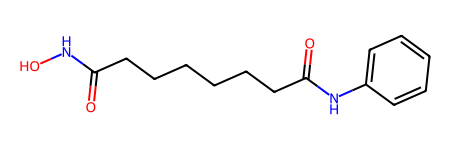

In [20]:
Chem.MolFromSmiles(df_new['Smiles'][418])

In [21]:
df_new

,Molecule ChEMBL ID,Smiles,pChEMBL Value,activity,Molecule
0,CHEMBL356769,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986730>
1,CHEMBL3605494,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,7.40,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986650>
2,CHEMBL4090647,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,7.58,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509861f0>
3,CHEMBL2018451,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,5.40,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986810>
4,CHEMBL4531802,O=C(NO)c1ccc(Cn2c3c(c4ccccc42)COCC3)cc1,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509866c0>
...,...,...,...,...,...
478,CHEMBL5194529,COc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccc(C(=O)Nc4cccc...,6.23,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a34c0>
479,CHEMBL5186622,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.75,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a3530>
480,CHEMBL4526892,CCCNNC(=O)c1ccc(CNC(=O)/C=C/c2ccccc2)cc1,8.11,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a35a0>
481,CHEMBL5178597,CCNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,5.97,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509a3610>


Part 3: calculator descriptors

In [25]:
#Length of descriptors from RDKit
des_list = [x[0] for x in Descriptors._descList]
len(des_list)

208

In [26]:
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)
descriptors = [calculator.CalcDescriptors(mol) for mol in df_new['Molecule']]

# Create a new DataFrame with descriptors
descriptors_df = pd.DataFrame(descriptors, columns=des_list)

# Concatenate the original DataFrame with the descriptors DataFrame
df_with_descriptors = pd.concat([df_new, descriptors_df], axis=1)

# Display the resulting DataFrame
df_with_descriptors.head()

,Molecule ChEMBL ID,Smiles,pChEMBL Value,activity,Molecule,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL356769,O=C(CCCCCCC(=O)Nc1ccc([C@H]2O[C@@H](CSc3nc(-c4...,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986730>,12.559087,-0.649209,12.559087,0.030471,0.034083,...,1,0,0,0,0,0,0,0,3,0
1,CHEMBL3605494,Nc1ccccc1NC(=O)c1ccc(CNC2=N[C@@H](c3ccccc3)CO2...,7.40,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986650>,12.394031,-0.197580,12.394031,0.023328,0.583005,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4090647,Cc1cc(C)cc(C(=O)N(CCCCCC(=O)NO)CC(=O)NCc2ccccc...,7.58,Strong Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509861f0>,13.126074,-0.427353,13.126074,0.031962,0.292610,...,0,0,0,0,0,0,0,0,2,0
3,CHEMBL2018451,CN1CCc2c(n(Cc3ccc(C(=O)NO)cc3)c3ccccc23)C1,5.40,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c0050986810>,11.472358,-0.488918,11.472358,0.449423,0.571539,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4531802,O=C(NO)c1ccc(Cn2c3c(c4ccccc42)COCC3)cc1,5.90,Weak Inhibitor,<rdkit.Chem.rdchem.Mol object at 0x7c00509866c0>,11.427879,-0.497693,11.427879,0.438929,0.575572,...,0,0,0,0,0,0,0,0,0,0


In [27]:
des_list

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

Part 4: Exploratory Data Analysis

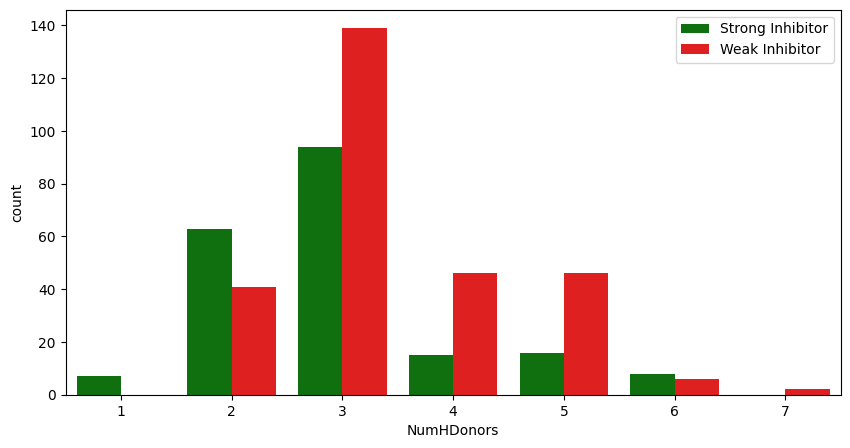

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'color' is defined
color = ['Green', 'Red']

# Set the figure size and dpi
plt.figure(figsize=(10, 5), dpi=100)

# Plot the countplot
sns.countplot(x='NumHDonors', hue='activity', data=df_with_descriptors, palette=color)

# Place the legend and set the order of labels
plt.legend(labels=['Strong Inhibitor', 'Weak Inhibitor'], loc='upper right')

# Show the plot
plt.show()


In [29]:
columns = [['NumHAcceptors', 'NumHDonors', 'NOCount', 'RingCount' ],
['NumAromaticRings', 'NumRotatableBonds', 'NumSaturatedRings', 'NumAromaticHeterocycles' ],
          ['NumSaturatedCarbocycles', 'fr_halogen', 'NumAliphaticHeterocycles', 'NHOHCount' ],
          ['NumAliphaticRings', 'NumSaturatedHeterocycles', 'NumAromaticCarbocycles', 'NumHeteroatoms' ]]

In [30]:
def plot_chart(column):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'color' is defined
    color = ['Green', 'Red']

    # Set the figure size and dpi
    plt.figure(figsize=(5, 5), dpi=100)

    # Plot the countplot
    sns.countplot(x=column, hue='activity', data=df_with_descriptors, palette=color)

    # Place the legend and set the order of labels
    plt.legend(labels=['Strong Inhibitor', 'Weak Inhibitor'], loc='upper right')




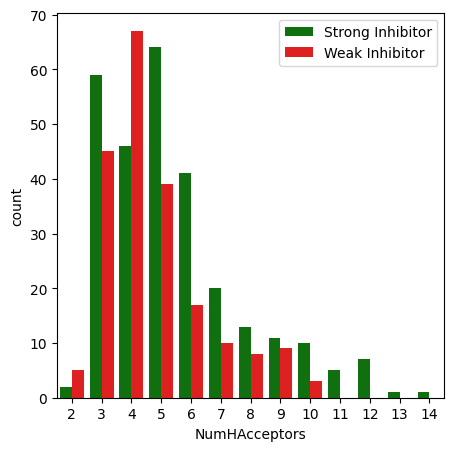

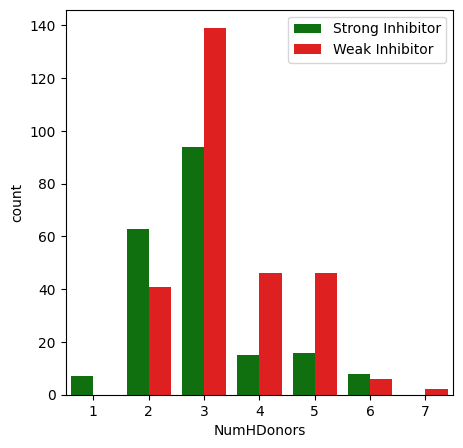

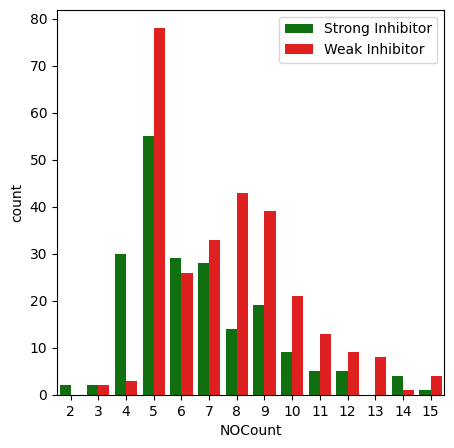

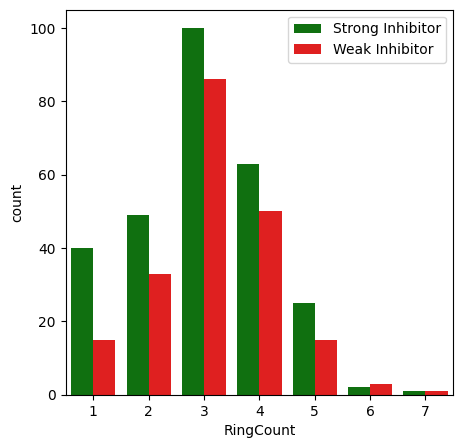

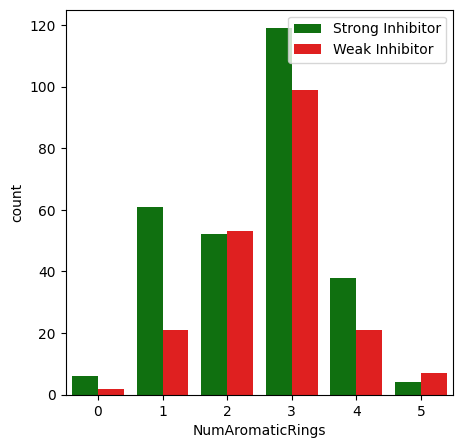

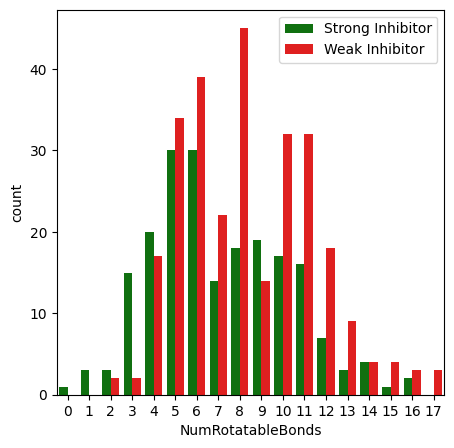

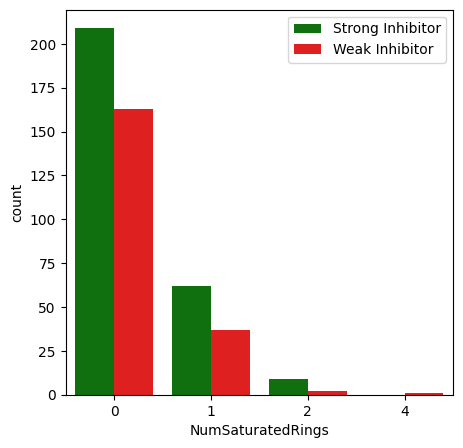

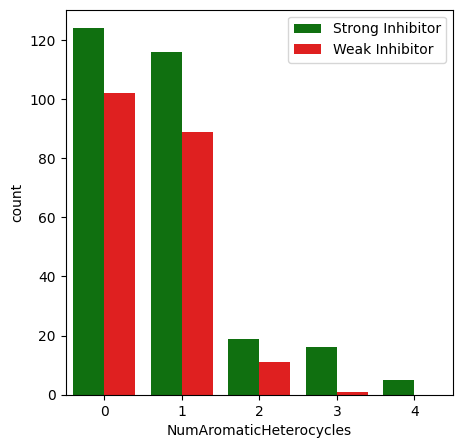

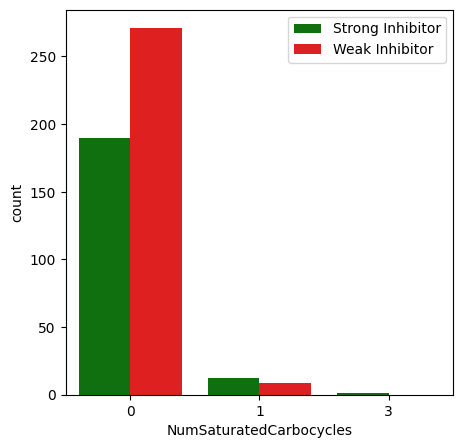

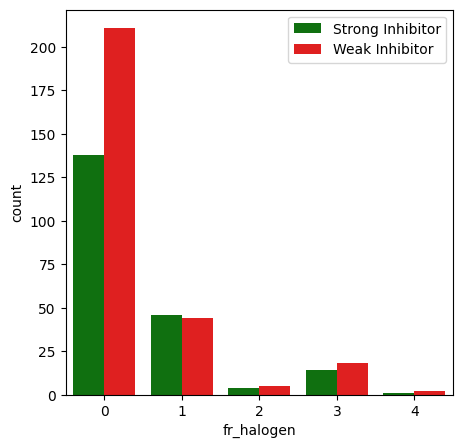

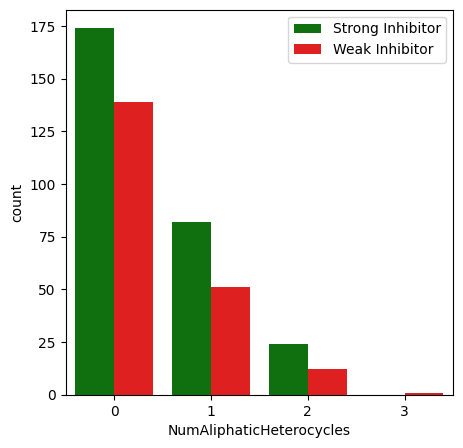

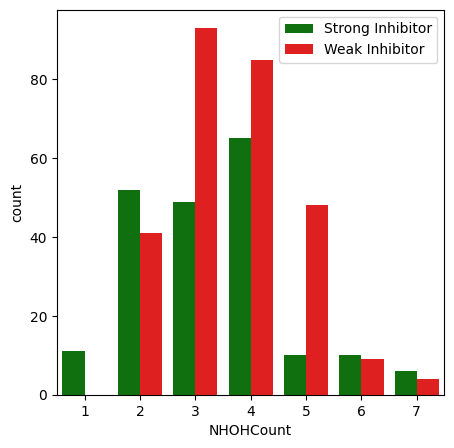

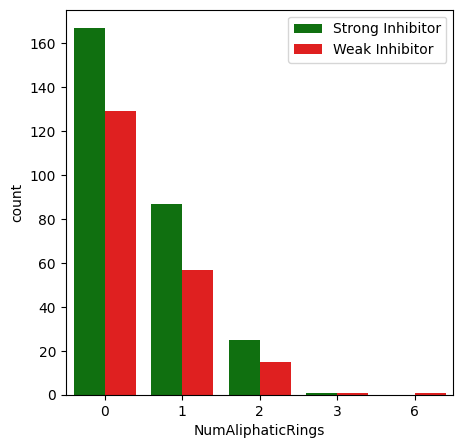

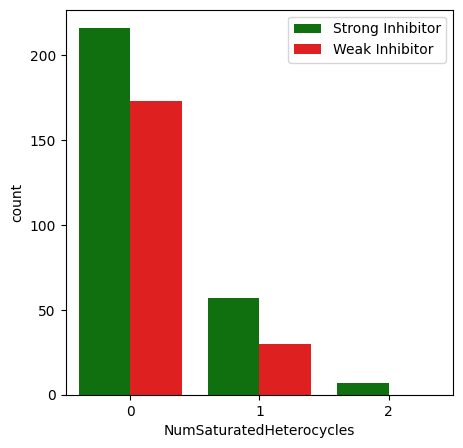

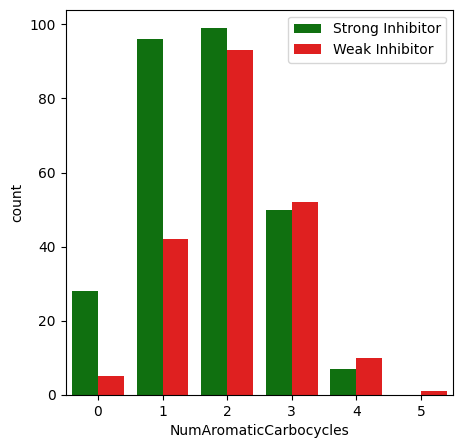

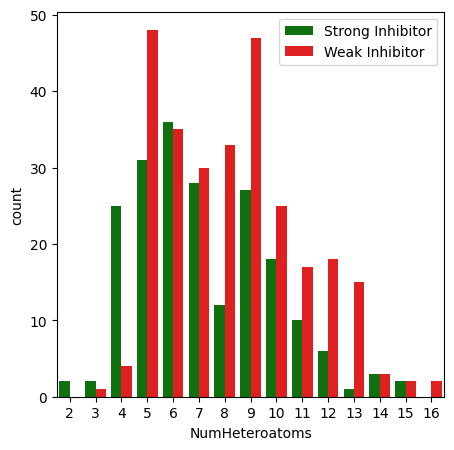

In [31]:
for rows in columns:
    for cols in rows:
        #print(cols)
        plot_chart(cols)

FileNotFoundError: [Errno 2] No such file or directory: 'results/Structural_descriptors_eda.png'

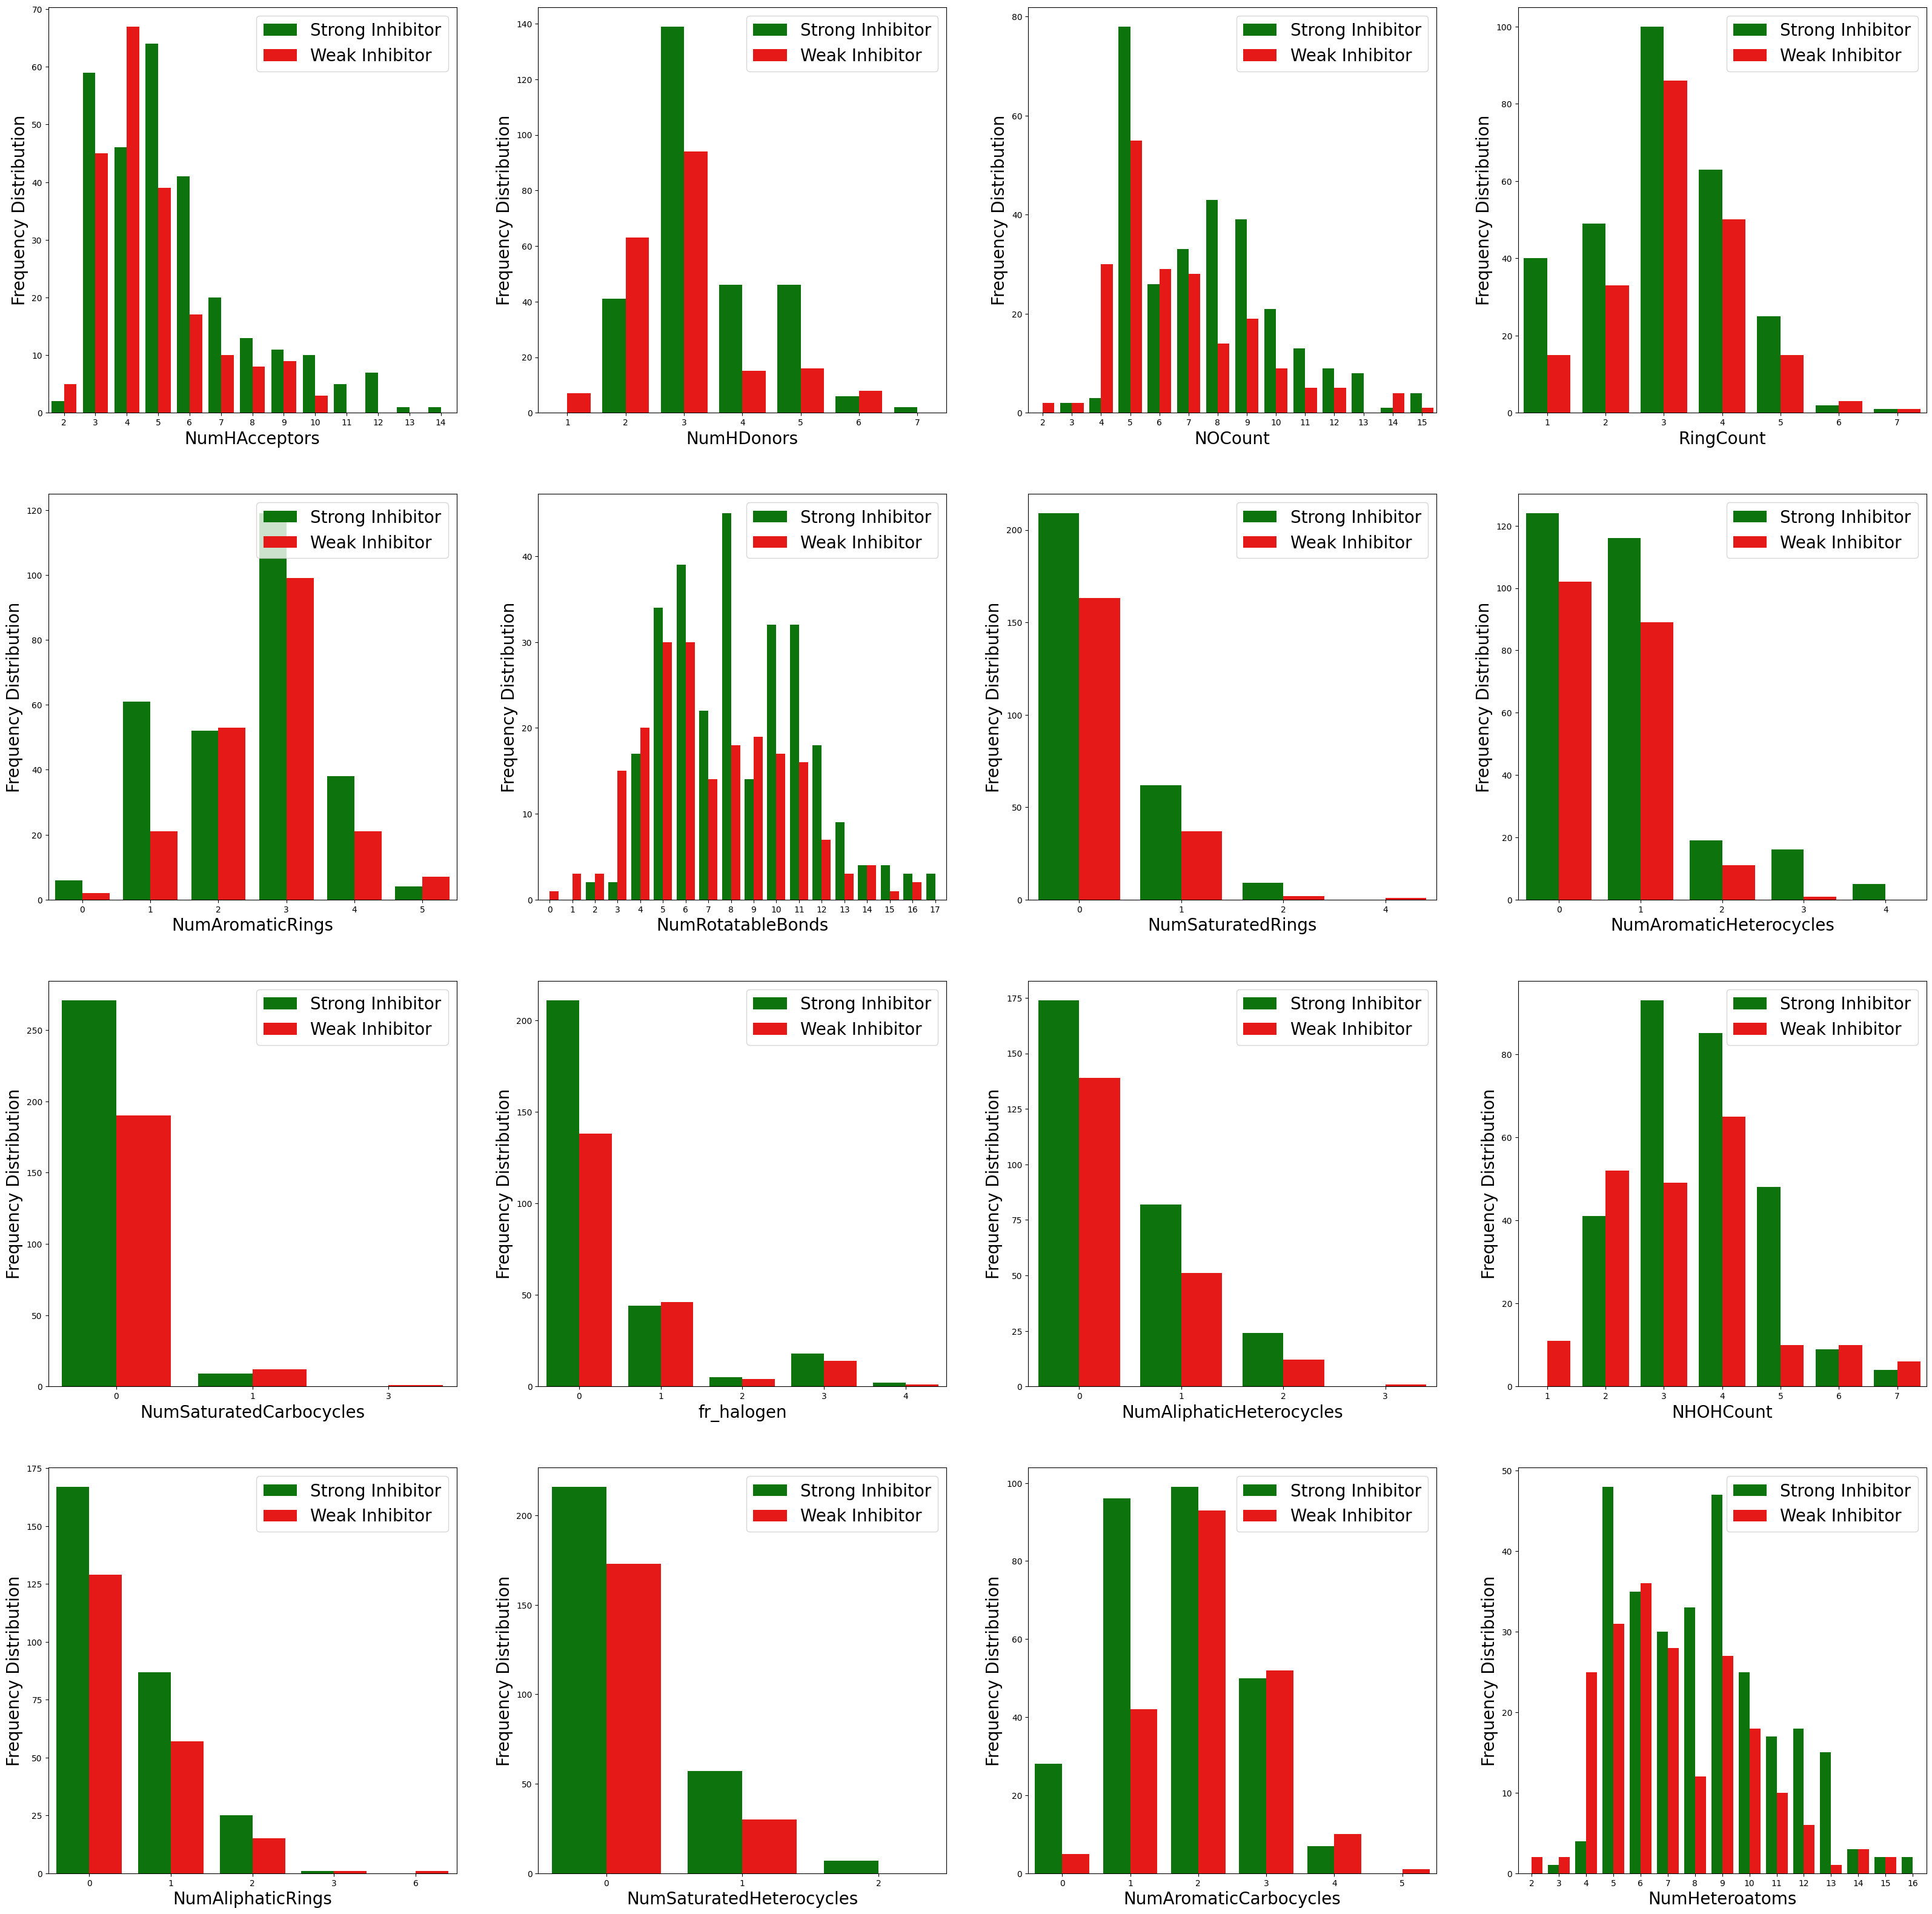

In [32]:
fig, axes = plt.subplots(4, 4, figsize=(40, 40))

subgroup_order = ['Strong Inhibitor', 'Weak Inhibitor']

for r in range(4):
    for c in range(4):
        sns.countplot(ax=axes[r, c], x = df_with_descriptors[columns[r][c]], hue=df_with_descriptors['activity'], saturation=0.8, palette=color, hue_order= subgroup_order)
        #axes[r, c].rc('font', {'font.size': 20})
        axes[r, c].legend(loc='upper right', fontsize = 20.0)
        axes[r, c].set_ylabel('Frequency Distribution', fontsize = 20.0)
        axes[r, c].set_xlabel(columns[r][c], fontsize = 20.0)

plt.rcParams.update({'font.size': 30})
fig.savefig('results/Structural_descriptors_eda.png')

In [ ]:
columns2 = [['qed', 'MolLogP'], ['MolWt', 'HeavyAtomCount']]

fig, axes = plt.subplots(2, 2, figsize=(40, 40))

plt.rcParams['font.size'] = '30'

for c in range(2):

    sns.scatterplot(ax=axes[0, c], x = df_with_descriptors[columns2[1][0]], y = df_with_descriptors[columns2[0][c]], hue=df_with_descriptors['activity'],  palette=color, hue_order=subgroup_order, s = 100)
    #axes[r, c].rc('font', {'font.size': 20})
    axes[0, c].legend(loc='upper right', fontsize = 20.0)
    axes[0, c].set_ylabel(columns2[0][c], fontsize = 20.0)
    axes[0, c].set_xlabel(columns2[1][0], fontsize = 20.0)

    sns.scatterplot(ax=axes[1, c], x = df_with_descriptors[columns2[1][1]], y = df_with_descriptors[columns2[0][c]], hue=df_with_descriptors['activity'],   palette=color, hue_order=subgroup_order, s = 100)
    #axes[r, c].rc('font', {'font.size': 20})
    axes[1, c].legend(loc='upper right', fontsize = 20.0)
    axes[1, c].set_ylabel(columns2[0][c], fontsize = 20.0)
    axes[1, c].set_xlabel(columns2[1][1], fontsize = 20.0)

plt.show()

fig.savefig('results/scatter_plots_eda.png')


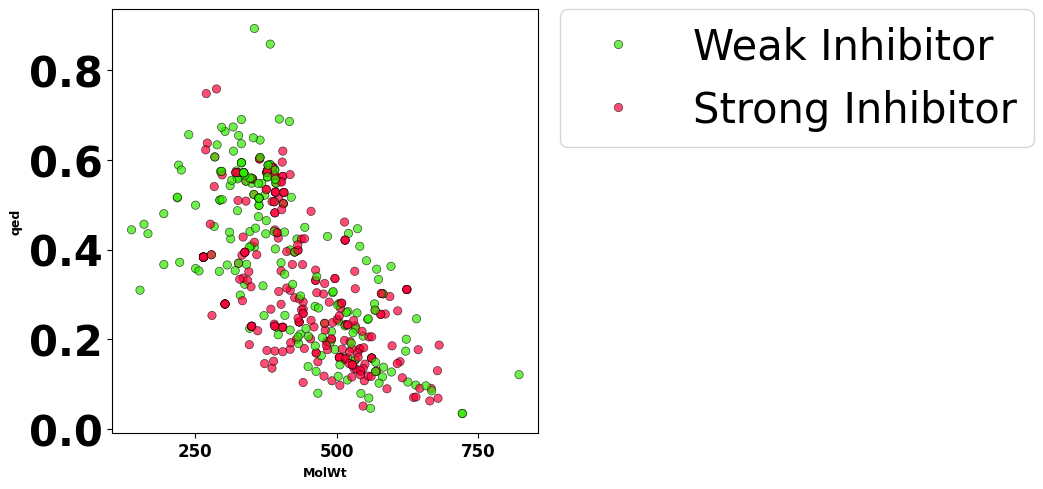

In [33]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWt', y='qed', data=df_with_descriptors, hue='activity', edgecolor='black', palette = "prism", alpha=0.7)

plt.xlabel('MolWt', fontsize=9, fontweight='bold')
plt.ylabel('qed', fontsize=9, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300


plt.savefig('plot_MolWt_vs_QED.pdf')

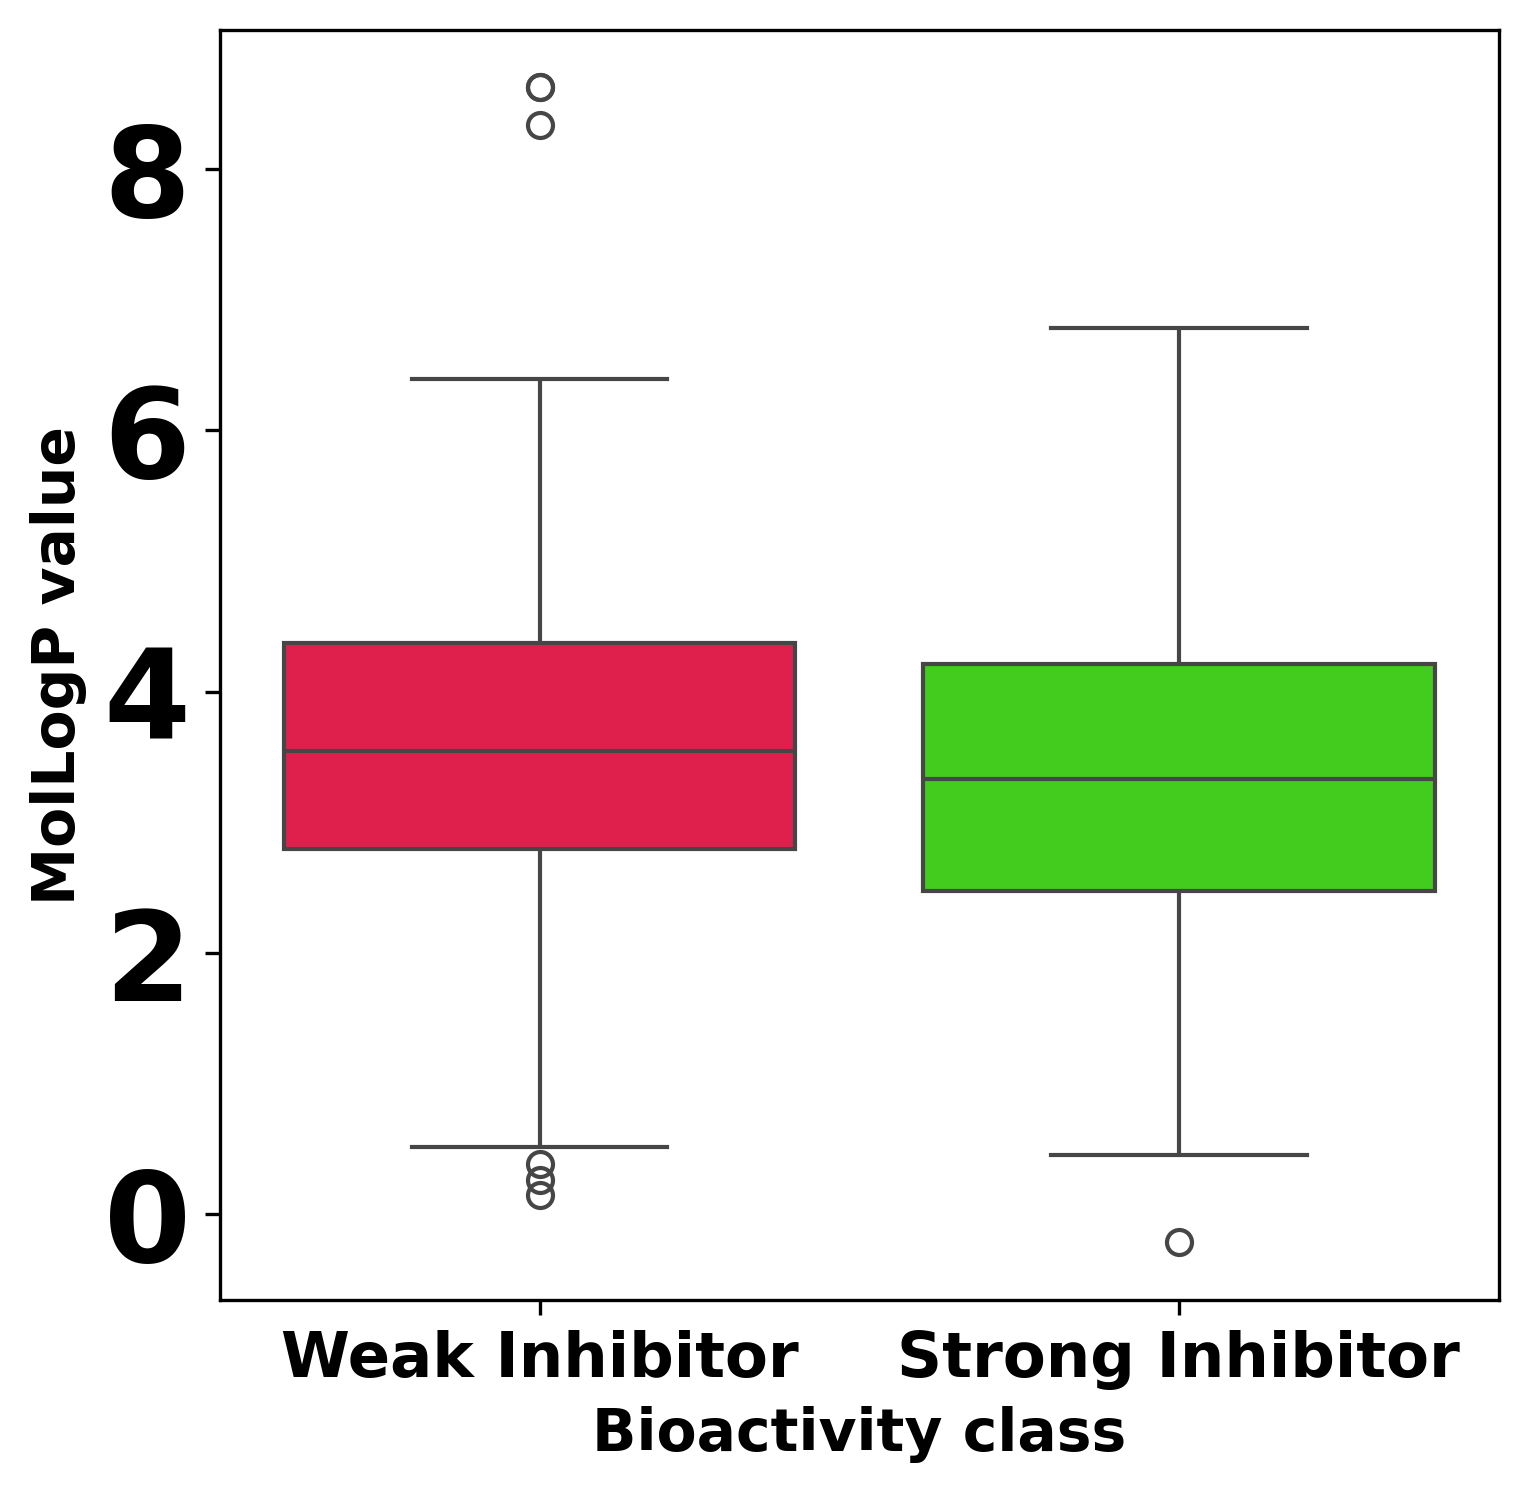

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'MolLogP', data = df_with_descriptors, palette="prism", hue = 'activity', legend= False, hue_order=subgroup_order)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MolLogP value', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi']=300

plt.savefig('MolLogP.pdf')

Part 5: feature selection
Split Dataset into Features and Target
In this step, we split our dataset into two parts: features (X) and the endpoint (y). The features (X) include all the columns that provide information about the patients' medical conditions, while the endpoint (y) is the target variable indicating whether the patient died.

We use the iloc method to achieve this split:

data.iloc[:, :-1]: This selects all rows and all columns except the last one. Here, : indicates all rows, and :-1 indicates all columns up to but not including the last column. This subset forms our features (X).
data.iloc[:, -1]: This selects all rows and only the last column, representing our endpoint (y).

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df_with_descriptors.iloc[:, 5:] #restart
y = df_with_descriptors['activity']

In [ ]:
y

0        Weak Inhibitor
1      Strong Inhibitor
2      Strong Inhibitor
3      Strong Inhibitor
4        Weak Inhibitor
             ...       
491      Weak Inhibitor
492      Weak Inhibitor
493    Strong Inhibitor
494      Weak Inhibitor
495      Weak Inhibitor
Name: activity, Length: 496, dtype: object

In [ ]:
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.559087,12.559087,0.030471,-0.649209,0.034083,17.076923,721.876,678.532,721.282172,270,...,1,0,0,0,0,0,0,0,3,0
1,12.394031,12.394031,0.023328,-0.197580,0.583005,15.310345,386.455,364.279,386.174276,146,...,0,0,0,0,0,0,0,0,0,0
2,13.126074,13.126074,0.031962,-0.427353,0.292610,10.419355,425.529,394.281,425.231456,166,...,0,0,0,0,0,0,0,0,2,0
3,12.913573,12.913573,0.071426,-4.573516,0.207144,16.750000,458.437,433.237,458.177705,176,...,0,0,0,0,0,0,0,0,2,0
4,11.472358,11.472358,0.449423,-0.488918,0.571539,14.480000,335.407,314.239,335.163377,128,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,13.837689,13.837689,0.008991,-0.205332,0.446595,16.925000,536.636,504.380,536.253589,204,...,0,0,0,0,0,0,0,0,0,0
492,12.456997,12.456997,0.148893,-0.221560,0.345134,10.827586,407.865,389.721,407.126136,146,...,0,0,0,0,0,0,0,0,0,0
493,11.864317,11.864317,0.157928,-0.171454,0.393953,10.600000,337.423,314.239,337.179027,130,...,0,0,0,0,0,0,0,0,1,0
494,12.485466,12.485466,0.159633,-0.220060,0.322380,10.866667,421.892,401.732,421.141786,152,...,0,0,0,0,0,0,0,0,0,0


Split Dataset into Training and Testing sets
To evaluate the performance of our machine learning model, it is important to split our dataset into training and testing sets. This allows us to train the model on one portion of the data and test its performance on another, unseen portion. By doing so, we can better assess how well the model generalizes to new, unseen data.

Choosing the Test Size
The test_size parameter determines the proportion of the dataset that will be reserved for testing. Common values for test_size range from 0.2 to 0.3 (i.e., 20% to 30% of the data). In this example, we set test_size to 0.25, meaning 25% of the data will be used for testing.

Stratified Sampling
We use stratify = y to ensure that the proportion of each class in the endpoint (y) is the same in both the training and testing sets. This technique, called stratified sampling, helps maintain the distribution of the endpoint, which is particularly important in cases of imbalanced classes.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def remove_correlated_features(descriptors):
    # Calculate correlation
    correlated_matrix = descriptors.corr().abs()

    # Upper triangle of correlation matrix
    upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(bool))

    # Identify columns that have above 0.9 values of correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.9)]
    #print(to_drop)
    descriptors_correlated_dropped = descriptors.drop(columns=to_drop, axis=1)
    return descriptors_correlated_dropped
descriptors_new = remove_correlated_features(X_train)
descriptors_new

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
56,15.152920,0.203938,-3.948019,0.351503,27.970588,531.676,0,0.347156,-0.344275,1.264706,...,1,0,0,0,0,1,0,0,0,0
227,12.639841,0.222752,-0.429879,0.369476,13.458333,326.352,0,0.260885,-0.288636,0.958333,...,0,0,0,0,0,0,0,0,2,0
391,13.086662,0.083796,-4.433286,0.398521,11.096774,431.389,0,0.415910,-0.396961,0.870968,...,0,0,0,0,0,0,0,0,0,0
329,13.160225,0.000484,-0.733218,0.145507,11.631579,521.662,0,0.251442,-0.496768,0.947368,...,0,0,0,0,0,0,0,0,5,0
220,14.037624,0.154760,-1.008217,0.310880,23.688889,623.795,0,0.245607,-0.417085,0.955556,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13.424401,0.217417,-0.833158,0.157847,11.452381,561.642,0,0.255217,-0.496768,0.833333,...,0,0,0,0,0,0,0,0,0,0
270,13.182825,0.024079,-1.073255,0.084684,15.346939,667.723,0,0.263904,-0.397046,0.795918,...,0,0,0,0,0,0,0,0,4,0
348,13.228292,0.007584,-1.094562,0.095852,15.437500,657.659,0,0.263904,-0.396961,0.895833,...,0,0,0,0,0,0,0,0,2,0
435,13.198414,0.208145,-0.436327,0.223648,12.848485,445.519,0,0.260887,-0.369765,0.909091,...,0,0,0,0,0,0,0,0,2,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_train = remove_low_variance(descriptors_new, threshold=0.1)
X_train

,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,BCUT2D_MWHI,BCUT2D_MRHI,AvgIpc,BalabanJ,BertzCT,HallKierAlpha,...,fr_N_O,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_unbrch_alkane
56,15.152920,-3.948019,27.970588,531.676,32.166655,8.143698,3.410299,2.009532,1013.531682,-1.99,...,0,1,0,0,4,0,2,0,0,0
227,12.639841,-0.429879,13.458333,326.352,16.466941,6.248902,2.610197,1.720279,765.020973,-2.73,...,1,0,0,0,0,0,0,0,0,2
391,13.086662,-4.433286,11.096774,431.389,19.413202,6.056812,2.699921,1.580106,1095.234033,-3.88,...,0,0,3,0,0,0,4,0,0,0
329,13.160225,-0.733218,11.631579,521.662,16.465332,5.976285,3.345296,1.518261,1175.185007,-3.85,...,0,0,0,0,1,1,0,1,1,5
220,14.037624,-1.008217,23.688889,623.795,16.644464,5.978768,3.414756,1.662739,1372.035655,-3.89,...,0,0,0,0,2,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13.424401,-0.833158,11.452381,561.642,16.465334,6.053584,3.431827,1.266282,1711.096149,-5.57,...,0,0,2,0,1,1,0,1,3,0
270,13.182825,-1.073255,15.346939,667.723,16.190699,6.252469,3.336468,0.964560,1790.977092,-6.05,...,0,0,4,0,1,0,0,0,2,4
348,13.228292,-1.094562,15.437500,657.659,19.142154,6.252467,3.306321,1.013947,1812.186239,-6.12,...,0,0,4,0,1,0,1,0,0,2
435,13.198414,-0.436327,12.848485,445.519,16.466955,6.263465,2.836822,1.558774,1170.616197,-3.71,...,1,0,1,0,0,0,0,0,0,2


Data Standardization

Note: If your data does not contain numerical features, you can skip this section.

Data standardization is a preprocessing step used to transform the numerical features of a dataset onto a standard scale. This is achieved by subtracting the mean and dividing by the standard deviation of each feature, resulting in a mean of 0 and a standard deviation of 1 for each feature.

Use standardization to scale the feature: x → (x - mean) / std
Here's why we use data standardization:

Equal Contribution: Ensures that all features have the same scale, preventing some features from dominating others in the model.
Algorithm Performance: Improves the performance and convergence speed of machine learning algorithms, especially those based on gradient descent optimization.
In code snippet below, we are performing data standardization using the StandardScaler class from the scikit-learn library.

Fitting the Scaler: First, we initialize a StandardScaler object (scaler) and fit it to the training data (X_train[num_cols]). Fitting the scaler calculates the mean and standard deviation of each feature in the training set.

Transforming the Data: Next, we use the fitted scaler to transform both the training and testing data. This transformation subtracts the mean and divides by the standard deviation for each feature, ensuring that both sets are scaled using the same parameters as the training set.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Use MinMaxScaler to normalize the DataFrame
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test[X_train.columns]), columns=X_test[X_train.columns].columns)

In [ ]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif
kBest = SelectKBest(mutual_info_classif, k = 10) #play around
X_kBestFeatures = kBest.fit_transform(X_train, y_train)
X_kBestFeatures.shape

(396, 10)

In [ ]:

X_kBestFeatures = X_train.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns


Index(['BCUT2D_MWHI', 'BCUT2D_MRHI', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA7',
       'SlogP_VSA2', 'TPSA', 'VSA_EState2', 'VSA_EState4', 'VSA_EState5'],
      dtype='object')

In [ ]:
f = kBest.get_support(1)
X_new = X_train[X_train.columns[f]]
X_new
data_scores = pd.DataFrame(kBest.scores_)
data_columns = pd.DataFrame(X_train.columns)

In [ ]:
X_train  = X_new

In [ ]:
X_train  = X_new
#Concat two dataframes for better visualization
featureScores = pd.concat([data_columns, data_scores], axis = 1)

#naming the dataframe columns
featureScores.columns = ['Features', 'Scores']
featureScores


,Features,Scores
0,MaxAbsEStateIndex,0.112026
1,MinEStateIndex,0.091048
2,SPS,0.110701
3,MolWt,0.087133
4,BCUT2D_MWHI,0.159147
...,...,...
85,fr_ether,0.012846
86,fr_halogen,0.000000
87,fr_methoxy,0.016552
88,fr_para_hydroxylation,0.005589


In [ ]:

#Print top 15 best features
print(featureScores.nlargest(10, 'Scores'))

       Features    Scores
42         TPSA  0.211878
5   BCUT2D_MRHI  0.159688
4   BCUT2D_MWHI  0.159147
59  VSA_EState5  0.152988
56  VSA_EState2  0.145714
27     SMR_VSA3  0.142536
25    SMR_VSA10  0.140828
31     SMR_VSA7  0.139929
37   SlogP_VSA2  0.138232
58  VSA_EState4  0.131975


In [ ]:
Graph = (featureScores.nlargest(10, 'Scores'))
Graph

,Features,Scores
42,TPSA,0.211878
5,BCUT2D_MRHI,0.159688
4,BCUT2D_MWHI,0.159147
59,VSA_EState5,0.152988
56,VSA_EState2,0.145714
27,SMR_VSA3,0.142536
25,SMR_VSA10,0.140828
31,SMR_VSA7,0.139929
37,SlogP_VSA2,0.138232
58,VSA_EState4,0.131975


In [ ]:
Graph.to_csv('Features.csv')

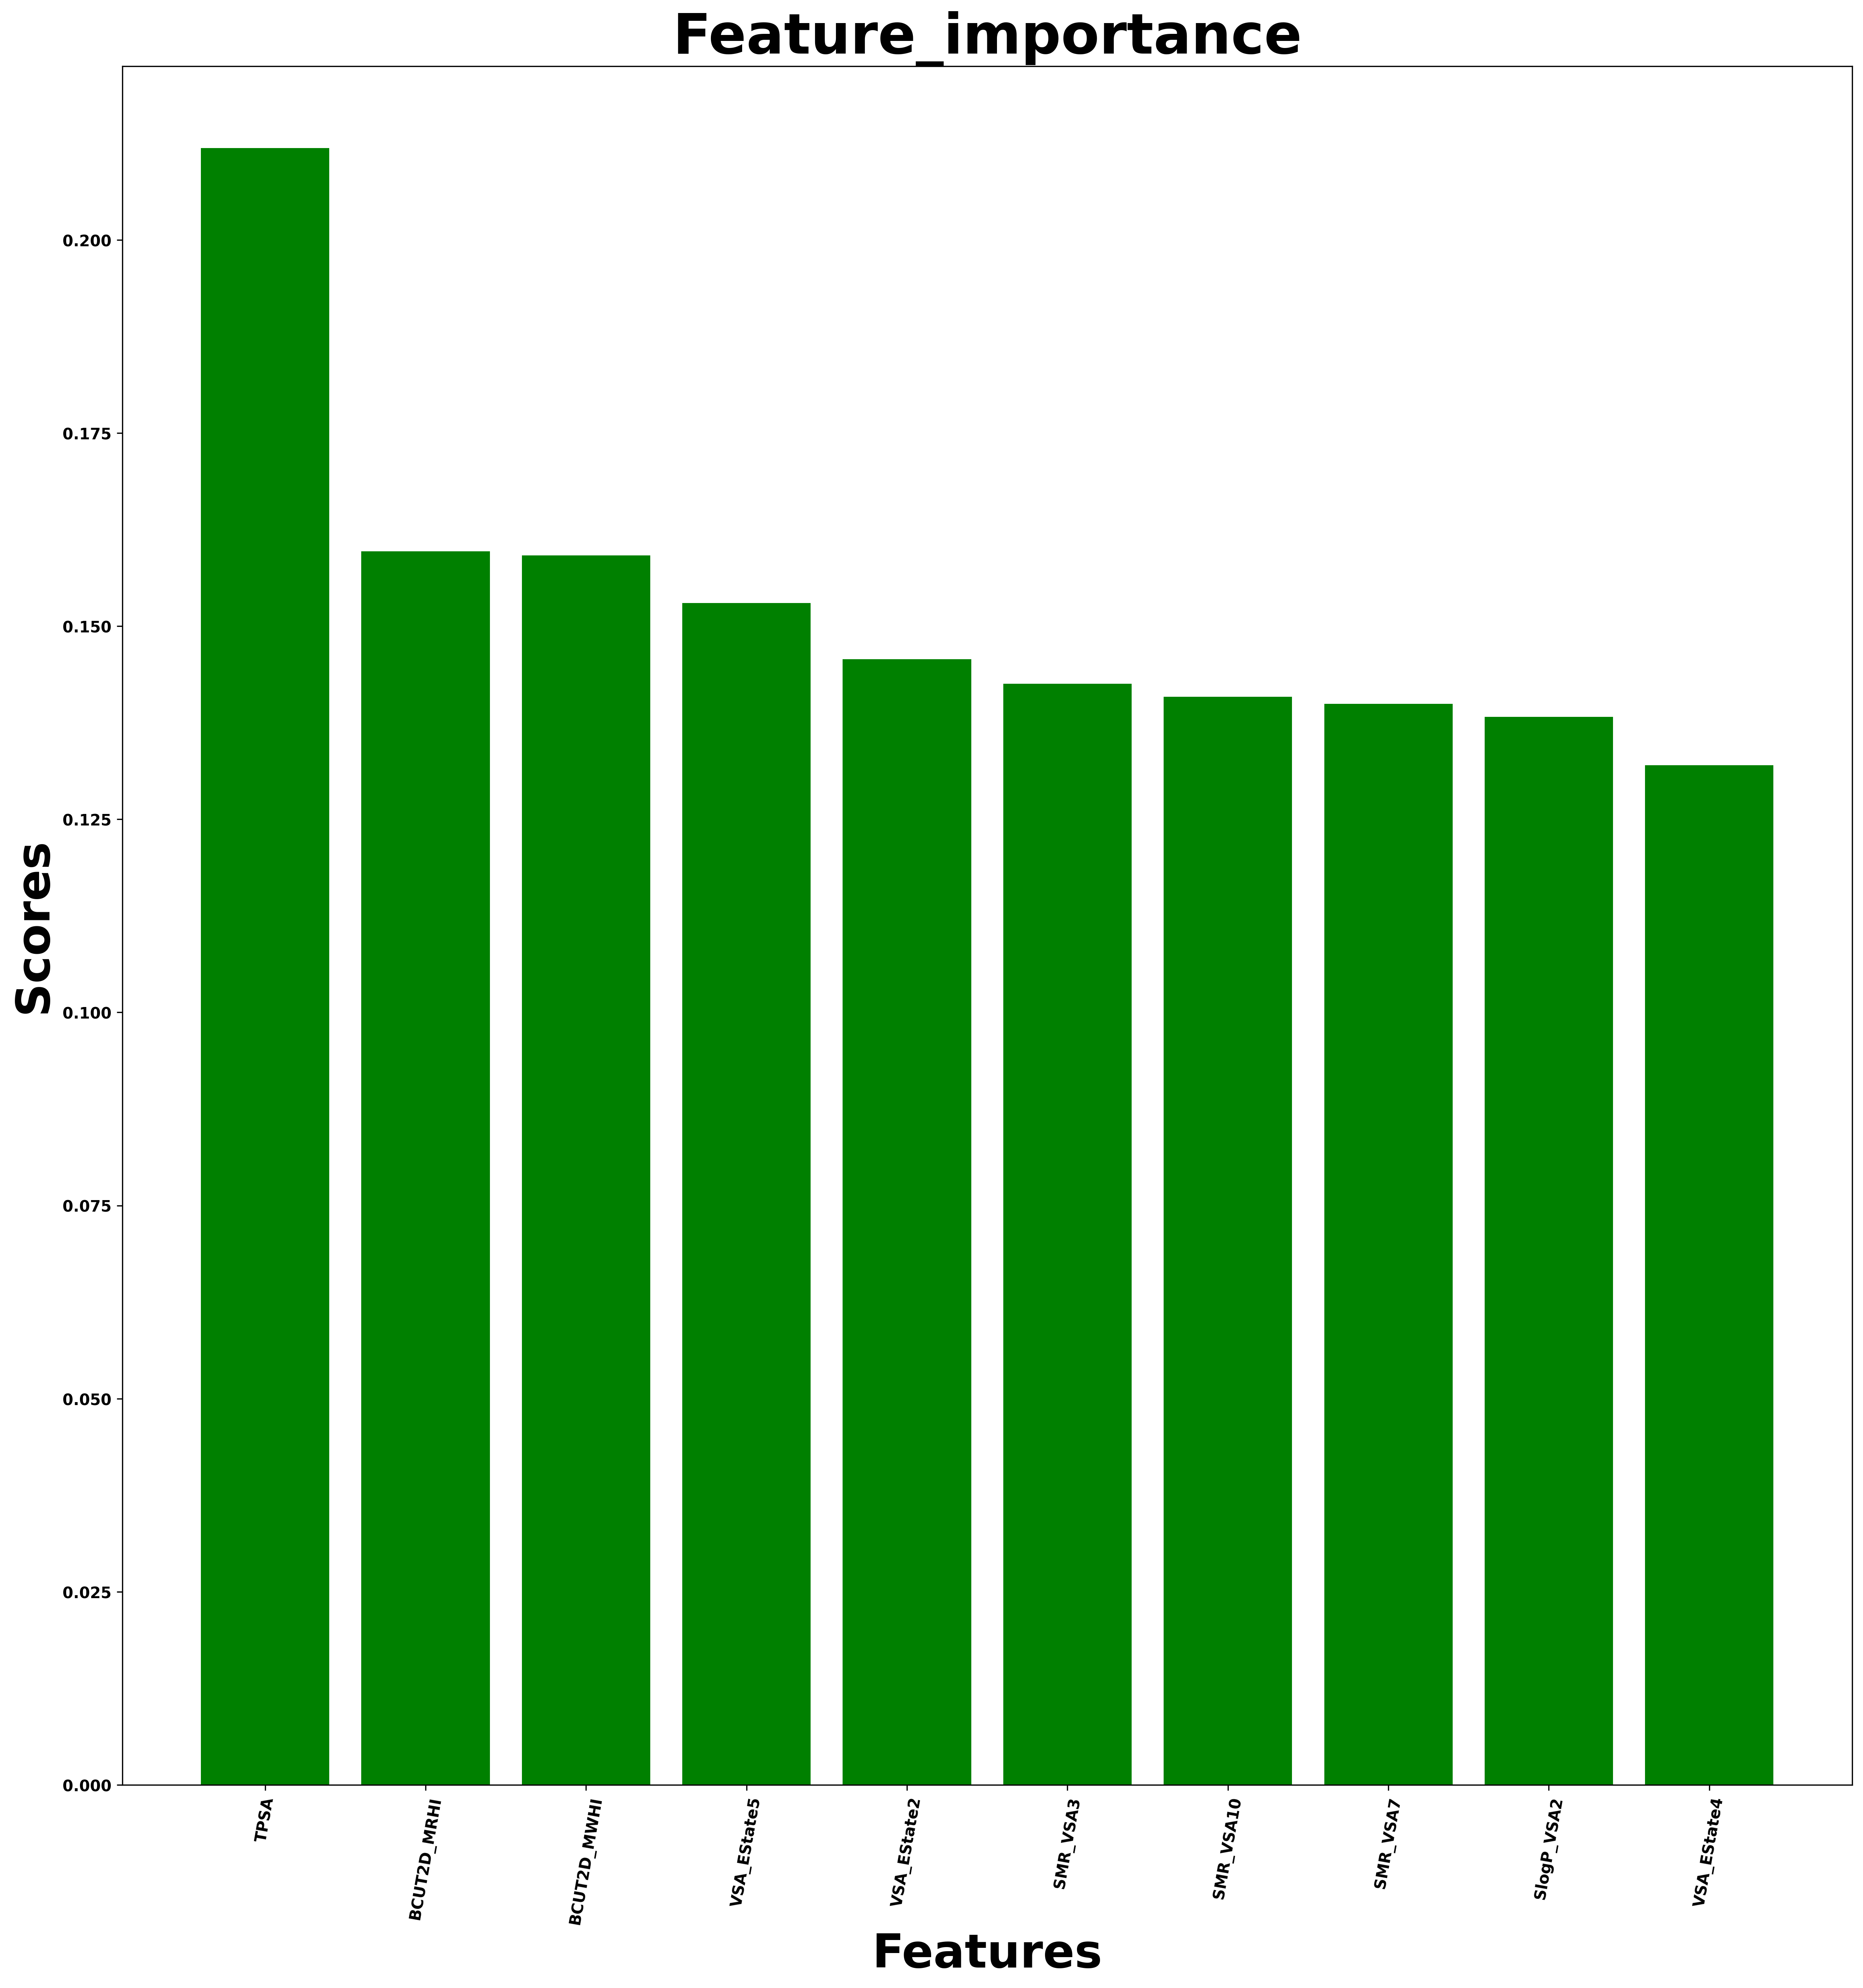

In [ ]:

import matplotlib.pyplot as plt
data = pd.read_csv('Features.csv')
df = pd.DataFrame(data)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 2])
fig = plt.figure(figsize=(20, 20))
plt.bar(X, Y, color='g')
plt.title("Feature_importance", fontweight="bold")
plt.xlabel("Features", fontweight = 'bold')
plt.ylabel("Scores", fontweight = 'bold')
plt.xticks(rotation = 80, fontsize =10, fontweight = 'bold')
plt.yticks(fontweight="bold", fontsize =10)

plt.savefig("results/top_10_Features.jpg", bbox_inches = 'tight')

In [ ]:

f = kBest.get_support(1)
X_test = X_test[X_test.columns[f]]
X_test.head()

,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,0.005634,0.063717,0.257575,0.232871,0.273526,0.353412,0.340721,0.186807,0.222136,0.684531
1,0.005016,0.068542,0.169275,0.223594,0.499083,0.196812,0.117715,0.130825,0.218439,0.497767
2,0.004987,0.048482,0.180013,0.121956,0.226060,0.132602,0.196367,0.254745,0.190658,0.449911
3,0.266046,0.898775,0.702980,0.473287,0.181318,0.670256,0.534720,0.739271,0.026582,0.287706
4,0.004987,0.054606,0.275138,0.476921,0.000000,0.465799,0.502764,0.541990,0.101472,0.395741


In [ ]:
X_test.head()

,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,0.005634,0.063717,0.257575,0.232871,0.273526,0.353412,0.340721,0.186807,0.222136,0.684531
1,0.005016,0.068542,0.169275,0.223594,0.499083,0.196812,0.117715,0.130825,0.218439,0.497767
2,0.004987,0.048482,0.180013,0.121956,0.226060,0.132602,0.196367,0.254745,0.190658,0.449911
3,0.266046,0.898775,0.702980,0.473287,0.181318,0.670256,0.534720,0.739271,0.026582,0.287706
4,0.004987,0.054606,0.275138,0.476921,0.000000,0.465799,0.502764,0.541990,0.101472,0.395741


Part 6: Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [ ]:
model1 = RandomForestClassifier(random_state = 24)
model2 = AdaBoostClassifier(random_state = 24)
model3 = GradientBoostingClassifier(random_state = 24)
model4 = ExtraTreesClassifier(random_state = 24)
#play here #restart here if you change model

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ExtraTreesClassifier(random_state=24)

In [ ]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)
predictions4 = model4.predict(X_test)


In [ ]:
#predictions1

In [ ]:
y_test

457    Strong Inhibitor
73       Weak Inhibitor
231    Strong Inhibitor
175    Strong Inhibitor
237      Weak Inhibitor
             ...       
247      Weak Inhibitor
382    Strong Inhibitor
19       Weak Inhibitor
320    Strong Inhibitor
483      Weak Inhibitor
Name: activity, Length: 100, dtype: object

Part 7: Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

In [ ]:
acc1 = accuracy_score(y_test, predictions1 )
acc2 = accuracy_score(y_test, predictions2 )
acc3 = accuracy_score(y_test, predictions3 )
acc4 = accuracy_score(y_test, predictions4 )

In [ ]:
print(acc1, acc2, acc3, acc4)

0.83 0.7 0.8 0.8


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model1, 'best_model.joblib')


['best_model.joblib']

In [ ]:
import joblib

In [ ]:
clr = classification_report(y_test, predictions1)

In [ ]:
print(clr)

                  precision    recall  f1-score   support

Strong Inhibitor       0.86      0.84      0.85        57
  Weak Inhibitor       0.80      0.81      0.80        43

        accuracy                           0.83       100
       macro avg       0.83      0.83      0.83       100
    weighted avg       0.83      0.83      0.83       100



In [ ]:
cfm = confusion_matrix(y_test, predictions1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

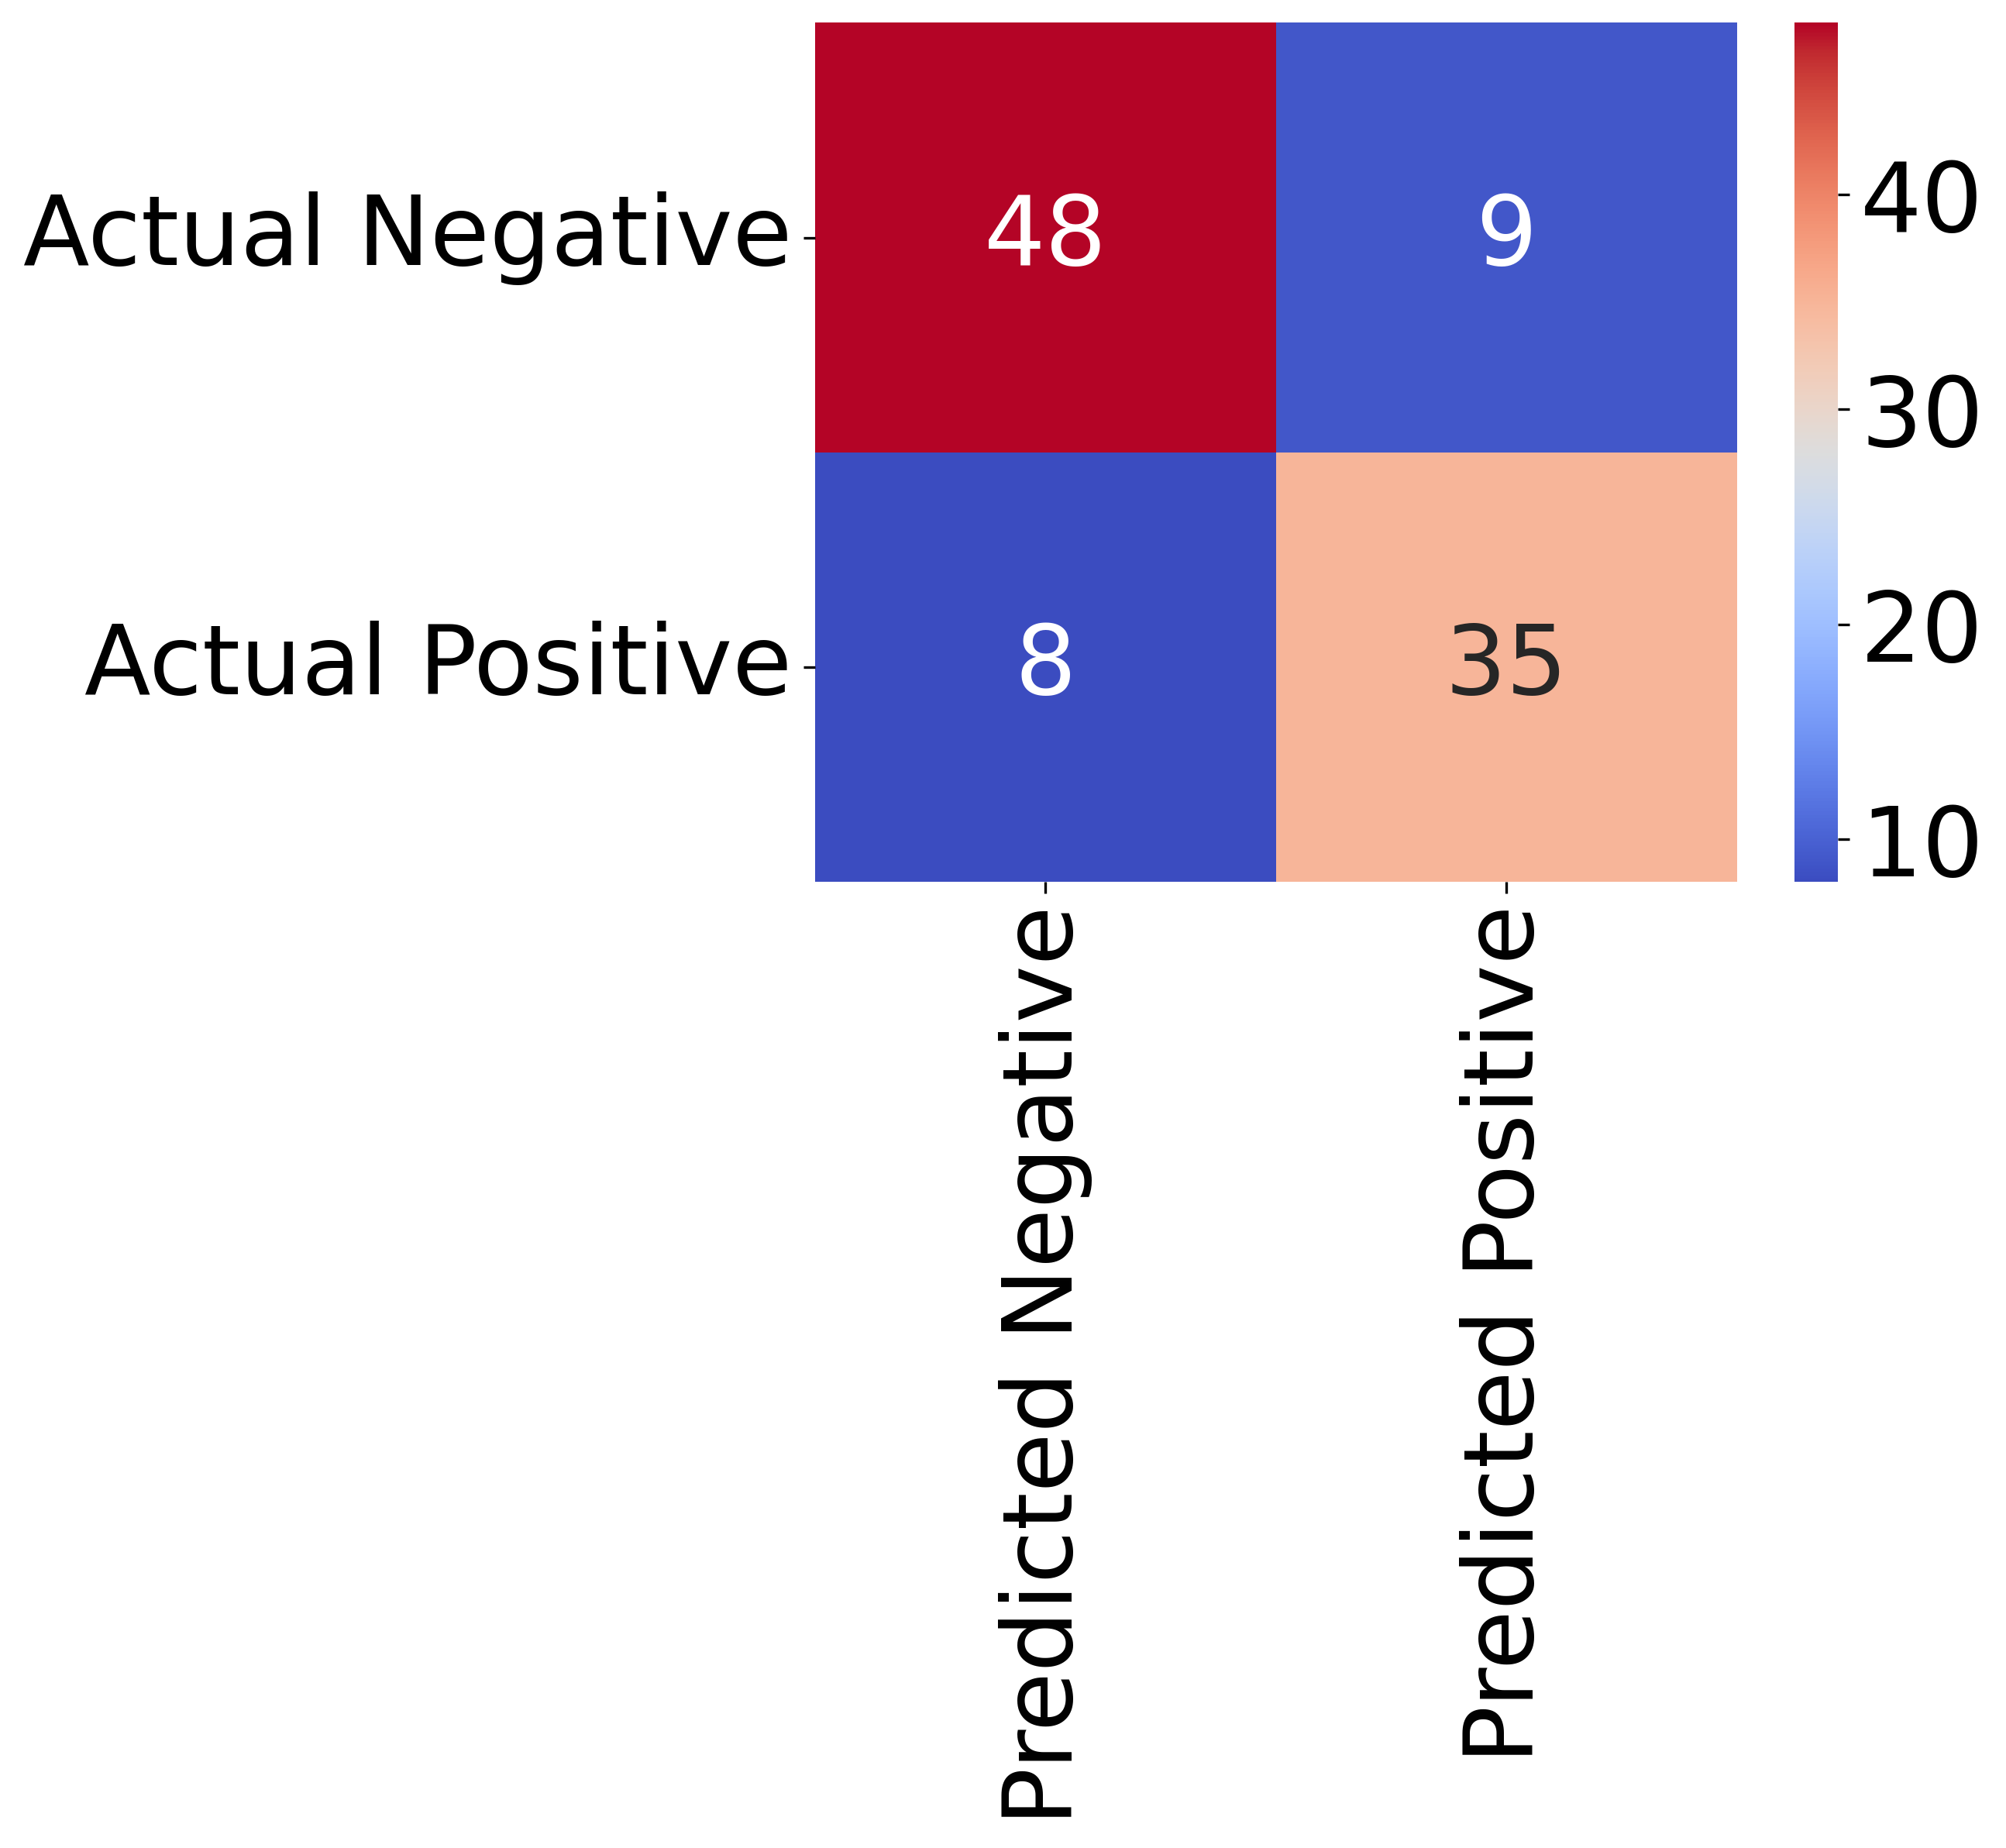

In [ ]:
sns.heatmap(cfm, fmt='d', annot=True, cmap='coolwarm',
           xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.savefig("results/confusion_matric.jpg", bbox_inches = 'tight')

In [ ]:
corr = X_train.corr()

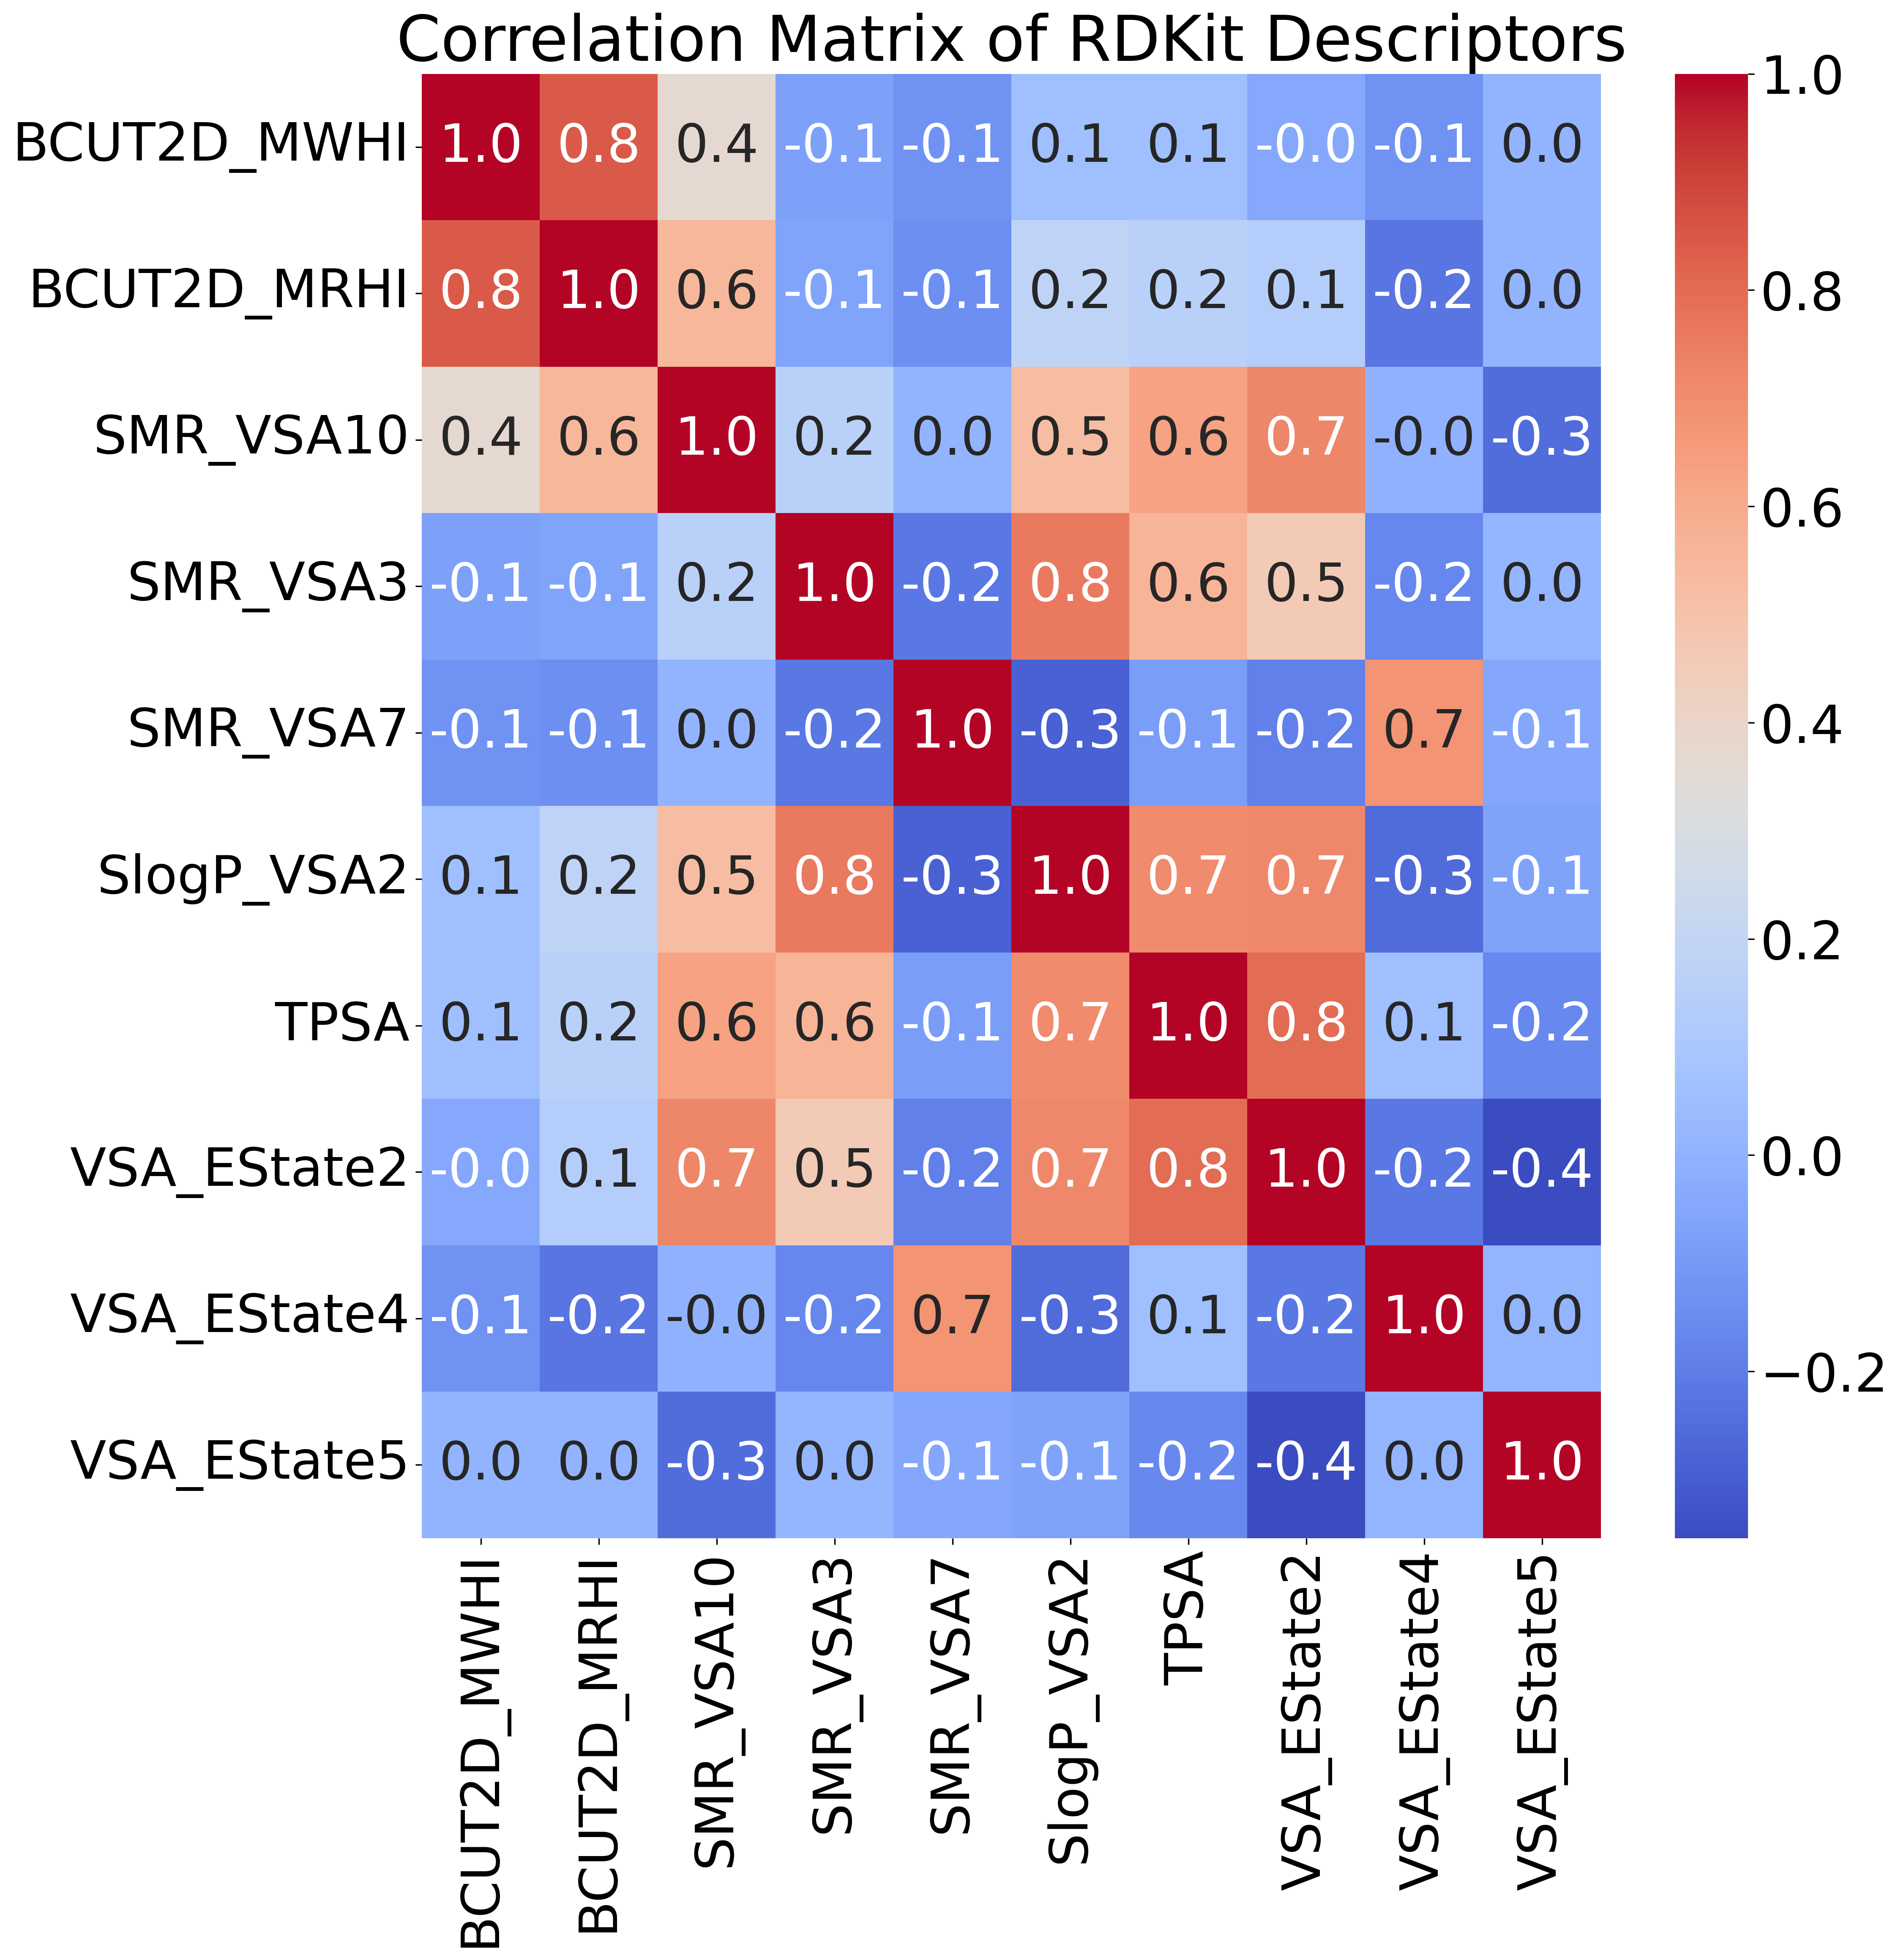

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.1f', annot = True, cmap='coolwarm',
            xticklabels=X_train.columns,
            yticklabels=X_train.columns)
plt.title('Correlation Matrix of RDKit Descriptors')

plt.savefig("results/correlation_matrix.jpg", bbox_inches = 'tight')

<Figure size 12000x12000 with 0 Axes>

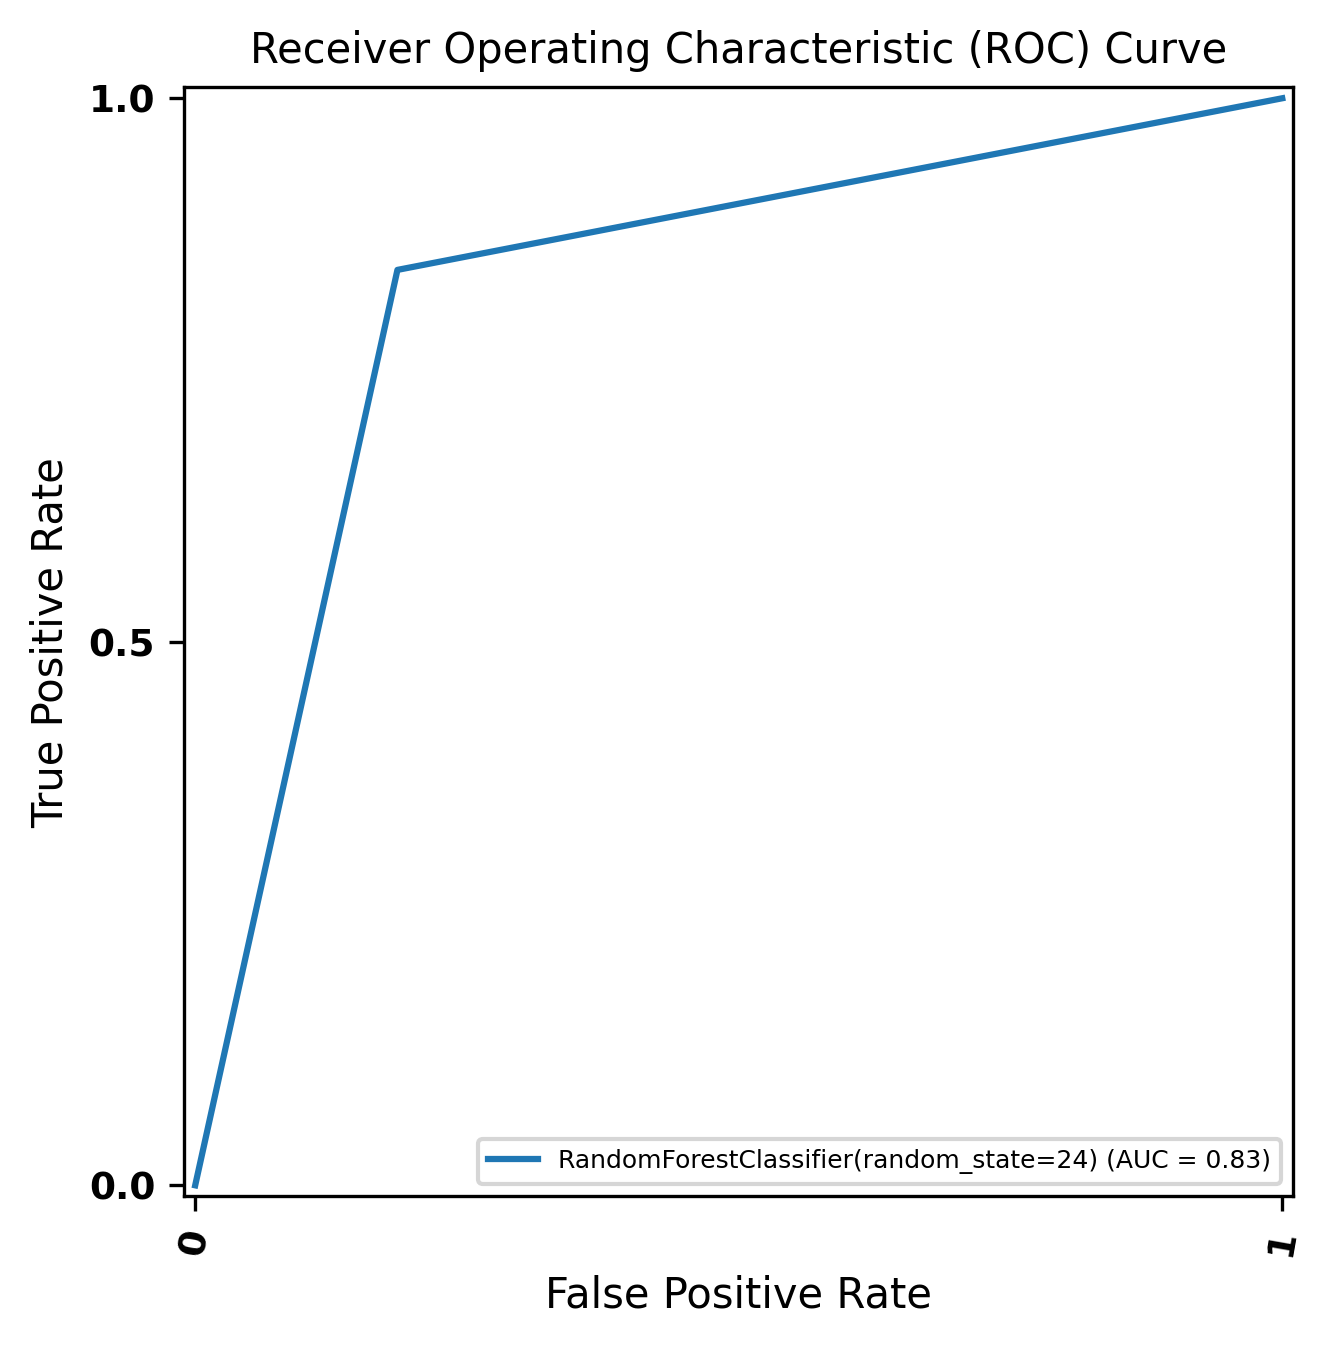

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

plt.figure(figsize=(40, 40))
# Example data (replace with your actual data)
y_test = np.array(y_test)
predictions = np.array(predictions1)

# Convert labels to numeric values
y_test_binary = np.where(y_test == "Strong Inhibitor", 1, 0)
predictions_binary = np.where(predictions == "Strong Inhibitor", 1, 0)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)

# Calculate ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name= model1)
display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize= 10)
plt.xlabel('False Positive Rate', fontsize= 10)
plt.ylabel('True Positive Rate', fontsize= 10)
plt.xticks(rotation = 80, fontsize =9, fontweight = 'bold')
plt.yticks(fontweight="bold", fontsize =9, )
plt.legend(fontsize=6, loc='lower right')

#plt.grid(True)

plt.savefig("results/AUC_ROC.jpg")




### make predictions


In [ ]:
import numpy as np
import pandas as pd
import rdkit as rk
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
external_compounds = pd.read_csv("world-not-fda.csv")

In [ ]:
external_compounds

,zinc_id,smiles
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...
...,...,...
4283,ZINC000101144764,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...
4284,ZINC000118913164,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...
4285,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...
4286,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...


In [ ]:
X_train.columns

NameError: name 'X_train' is not defined

In [ ]:
external_compounds = external_compounds[['cmpdname','isosmiles']]

In [ ]:
external_compounds.columns = ['Name', 'SMILES']
external_compounds

,Name,SMILES
0,Acetyl-DL-carnitine,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
1,1-Aminopropan-2-ol,CC(CN)O
2,"(2,3,4,5,6-Pentahydroxycyclohexyl) dihydrogen ...",C1(C(C(C(C(C1O)O)OP(=O)(O)O)O)O)O
3,"1,2,3,5-Tetrahydroxybenzene",C1=C(C=C(C(=C1O)O)O)O
4,7-[3-Hydroxy-5-oxo-2-(3-oxooct-1-enyl)cyclopen...,CCCCCC(=O)C=CC1C(CC(=O)C1CCCCCCC(=O)O)O
...,...,...
215920,"(1S,13S,16S,18S)-18-methoxy-15-methyl-12-[(2S)...",CC[C@H](C)CN1[C@@H]2C(=O)N([C@@H]3[C@]2(C=C[C@...
215921,methyl 4-[(E)-2-acetyl-4-oxotridec-1-enyl]-6-p...,CCCCCCCCCC(=O)C/C(=C\C1=C(C=NC(=C1)CCC)C(=O)OC...
215922,"(1S,13S,16S,18S)-18-methoxy-15-methyl-12-(2-ph...",CN1[C@H]2C[C@@H](C=C[C@@]23[C@@H](C1=O)N(C(=O)...
215923,"[(2R,3S,4S,5R,6S)-3,4-dihydroxy-6-[7-hydroxy-2...",COC1=C(C=CC(=C1)/C=C/C(=O)OC[C@@H]2[C@H]([C@@H...


In [ ]:
from rdkit.Chem import Descriptors
from tqdm import tqdm
# empty dictionary for pandasCalcExactMolWt, CalcCrippenDescriptors,
properties = {"zinc_id": [], "Smiles": [], 'BCUT2D_MWHI': [], 'BCUT2D_MRHI': [], 'SMR_VSA10': [], 'SMR_VSA3': [], 'SMR_VSA7': [],
              'SlogP_VSA2': [], 'TPSA': [], 'VSA_EState2': [], 'VSA_EState4': [], 'VSA_EState5': []}


for idx, smiles in enumerate(tqdm(external_compounds['smiles'])):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        continue
    properties["BCUT2D_MWHI"].append(Descriptors.BCUT2D_MWHI(mol))
    properties["BCUT2D_MRHI"].append(Descriptors.BCUT2D_MRHI(mol))
    properties["SMR_VSA10"].append(Descriptors.SMR_VSA10(mol))
    properties["SMR_VSA3"].append(Descriptors.SMR_VSA3(mol))
    properties["SMR_VSA7"].append(Descriptors.SMR_VSA7(mol))
    properties["SlogP_VSA2"].append(Descriptors.SlogP_VSA2(mol))
    properties["TPSA"].append(Descriptors.TPSA(mol))
    properties["VSA_EState2"].append(Descriptors.VSA_EState2(mol))
    properties["VSA_EState4"].append(Descriptors.VSA_EState4(mol))
    properties["VSA_EState5"].append(Descriptors.VSA_EState5(mol))

    properties["Smiles"].append(external_compounds['smiles'].iloc[idx])
    properties["zinc_id"].append(external_compounds['zinc_id'].iloc[idx])


external_compounds_new = pd.DataFrame(properties)


external_compounds_new

100%|██████████| 4288/4288 [00:23<00:00, 178.72it/s]


,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,16.365371,5.660620,5.969305,0.000000,24.304080,44.204398,97.99,10.486094,-0.889232,-1.042904
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141
...,...,...,...,...,...,...,...,...,...,...,...,...
4283,ZINC000101144764,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...,32.134737,7.116337,28.642877,0.000000,44.779888,60.049788,59.06,14.328221,-1.719620,-0.561483
4284,ZINC000118913164,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...,16.285945,5.824045,5.783245,0.000000,11.146209,16.490823,37.30,11.746204,2.075027,5.058308
4285,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908
4286,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304


In [ ]:
external_compounds_new= external_compounds_new.dropna()

In [ ]:
external_compounds_new

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,16.365371,5.660620,5.969305,0.000000,24.304080,44.204398,97.99,10.486094,-0.889232,-1.042904
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141
...,...,...,...,...,...,...,...,...,...,...,...,...
4283,ZINC000101144764,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...,32.134737,7.116337,28.642877,0.000000,44.779888,60.049788,59.06,14.328221,-1.719620,-0.561483
4284,ZINC000118913164,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...,16.285945,5.824045,5.783245,0.000000,11.146209,16.490823,37.30,11.746204,2.075027,5.058308
4285,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908
4286,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304


In [ ]:
external_compounds_new=external_compounds_new.reset_index()

In [ ]:
external_compounds_new=external_compounds_new.drop(columns=['index'])

In [ ]:
external_compounds_new

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,16.365371,5.660620,5.969305,0.000000,24.304080,44.204398,97.99,10.486094,-0.889232,-1.042904
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141
...,...,...,...,...,...,...,...,...,...,...,...,...
4278,ZINC000101144764,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...,32.134737,7.116337,28.642877,0.000000,44.779888,60.049788,59.06,14.328221,-1.719620,-0.561483
4279,ZINC000118913164,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...,16.285945,5.824045,5.783245,0.000000,11.146209,16.490823,37.30,11.746204,2.075027,5.058308
4280,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908
4281,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304


In [ ]:
external_compounds_new_test = external_compounds_new.iloc[:, 2:]

In [ ]:
external_compounds_new_test

,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5
0,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695
1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352
2,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306
3,16.365371,5.660620,5.969305,0.000000,24.304080,44.204398,97.99,10.486094,-0.889232,-1.042904
4,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141
...,...,...,...,...,...,...,...,...,...,...
4278,32.134737,7.116337,28.642877,0.000000,44.779888,60.049788,59.06,14.328221,-1.719620,-0.561483
4279,16.285945,5.824045,5.783245,0.000000,11.146209,16.490823,37.30,11.746204,2.075027,5.058308
4280,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908
4281,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304


In [ ]:
import joblib
Model1 = joblib.load("best_model.joblib")

In [ ]:
external_compounds_new_predictions = Model1.predict(external_compounds_new_test)

In [ ]:
external_compounds_new['prediction'] = external_compounds_new_predictions

In [ ]:
external_compounds_new

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5,prediction
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695,Strong Inhibitor
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352,Strong Inhibitor
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306,Strong Inhibitor
3,ZINC000003830381,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,16.365371,5.660620,5.969305,0.000000,24.304080,44.204398,97.99,10.486094,-0.889232,-1.042904,Weak Inhibitor
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141,Strong Inhibitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,ZINC000101144764,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...,32.134737,7.116337,28.642877,0.000000,44.779888,60.049788,59.06,14.328221,-1.719620,-0.561483,Weak Inhibitor
4279,ZINC000118913164,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...,16.285945,5.824045,5.783245,0.000000,11.146209,16.490823,37.30,11.746204,2.075027,5.058308,Weak Inhibitor
4280,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908,Strong Inhibitor
4281,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304,Strong Inhibitor


In [ ]:
external_compounds_new['prediction'].value_counts()

prediction
Strong Inhibitor    2549
Weak Inhibitor      1734
Name: count, dtype: int64

In [ ]:
top_external_compounds_new = external_compounds_new[external_compounds_new['prediction'] == 'Strong Inhibitor']

In [ ]:
top_external_compounds_new

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5,prediction
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695,Strong Inhibitor
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352,Strong Inhibitor
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306,Strong Inhibitor
4,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141,Strong Inhibitor
5,ZINC000003830515,CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=CC...,32.166637,7.998328,29.545550,10.216698,35.071309,51.000510,112.73,37.276871,7.488417,-1.405680,Strong Inhibitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,ZINC000100017742,CC(C)(O)[C@@H]1[C@H]2OC(=O)[C@H]1[C@]1(O)C[C@H...,16.688722,5.912252,11.938611,0.000000,0.000000,57.266717,105.59,24.767412,-4.886603,-2.507575,Strong Inhibitor
4276,ZINC000100057533,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,16.487452,5.988005,11.594566,4.899910,41.478044,48.691132,32.78,18.086936,4.353665,1.349709,Strong Inhibitor
4280,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908,Strong Inhibitor
4281,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304,Strong Inhibitor


In [ ]:
top_external_compounds_new.to_csv("top_fda_compounds_new.csv", index=False)

In [ ]:
top_external_compounds_new = top_external_compounds_new.reset_index()

In [ ]:
top_external_compounds_new = top_external_compounds_new.drop(columns=['index'])
top_external_compounds_new

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5,prediction
0,ZINC000001532673,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,33.114601,8.763070,33.526407,0.000000,0.000000,45.741054,126.64,20.538353,10.423766,-1.680695,Strong Inhibitor
1,ZINC000001408068,O=C(O)c1cc(O)nc(O)n1,16.367588,5.851102,5.969305,9.967957,11.760295,31.256845,103.54,16.364630,-0.449074,-1.909352,Strong Inhibitor
2,ZINC000001532582,NC(=O)CCCC[C@H]1CCSS1,33.114765,8.769354,27.494976,0.000000,0.000000,16.909971,43.09,10.408306,5.038424,1.133306,Strong Inhibitor
3,ZINC000003830394,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,32.167942,8.005480,41.307435,30.423953,47.165431,76.025305,150.54,38.234888,0.901207,-1.752141,Strong Inhibitor
4,ZINC000003830515,CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=CC...,32.166637,7.998328,29.545550,10.216698,35.071309,51.000510,112.73,37.276871,7.488417,-1.405680,Strong Inhibitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,ZINC000100017742,CC(C)(O)[C@@H]1[C@H]2OC(=O)[C@H]1[C@]1(O)C[C@H...,16.688722,5.912252,11.938611,0.000000,0.000000,57.266717,105.59,24.767412,-4.886603,-2.507575,Strong Inhibitor
2545,ZINC000100057533,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,16.487452,5.988005,11.594566,4.899910,41.478044,48.691132,32.78,18.086936,4.353665,1.349709,Strong Inhibitor
2546,ZINC000085537078,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,19.285206,5.946220,34.498227,14.783798,70.934525,122.065559,133.87,52.474863,-1.643104,-5.922908,Strong Inhibitor
2547,ZINC000085537089,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,35.495693,6.302582,52.164015,24.583617,100.203321,127.650432,139.72,72.249225,2.981649,-0.909304,Strong Inhibitor


# Remove compounds that violate RO5

In [ ]:
from rdkit.Chem import Descriptors, Crippen
# Define a function to calculate Ro5 properties and check for violations
def calculate_ro5(SMILES):
    mol = Chem.MolFromSmiles(SMILES)
    if mol is None:
        return (None, None, None, None, 4)  # Assume 4 violations if molecule is invalid

    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    mw = Descriptors.MolWt(mol)
    logp = Crippen.MolLogP(mol)

    violations = sum([hbd > 5, hba > 10, mw >= 500, logp >= 5])
    return (hbd, hba, mw, logp, violations)

# Apply the function to each row in the DataFrame
top_external_compounds_new[['HBD', 'HBA', 'MW', 'LogP', 'Violations']] = top_external_compounds_new['Smiles'].apply(lambda x: pd.Series(calculate_ro5(x)))

# Filter out molecules that violate more than 2 Ro5 rules
RO5filtered_top_external_compounds = top_external_compounds_new[top_external_compounds_new['Violations'] == 0]

# Save the filtered DataFrame to a new CSV file
RO5filtered_top_external_compounds.to_csv('RO5filtered_top_external_compounds.csv', index=False)

print(f"RO5filtered_top_external_compounds saved to 'RO5filtered_top_external_compounds'. Total molecules: {len(RO5filtered_top_external_compounds)}")

RO5filtered_top_external_compounds saved to 'RO5filtered_top_external_compounds'. Total molecules: 1910


# QED Screening

In [ ]:
RO5filtered_top_external_compounds.columns

Index(['zinc_id', 'Smiles', 'BCUT2D_MWHI', 'BCUT2D_MRHI', 'SMR_VSA10',
       'SMR_VSA3', 'SMR_VSA7', 'SlogP_VSA2', 'TPSA', 'VSA_EState2',
       'VSA_EState4', 'VSA_EState5', 'prediction', 'HBD', 'HBA', 'MW', 'LogP',
       'Violations'],
      dtype='object')

In [ ]:
from rdkit.Chem import QED
# Calculate QED scores and add them to the DataFrame
RO5filtered_top_external_compounds['qed_score'] = RO5filtered_top_external_compounds['Smiles'].apply(lambda x: QED.qed(Chem.MolFromSmiles(x)))

# Filter compounds with QED score above a threshold (0.6)
threshold = 0.6
QEDfiltered_RO5_top_external_compounds = RO5filtered_top_external_compounds[RO5filtered_top_external_compounds['qed_score'] >= threshold]

# Save the filtered compounds to a new CSV file
QEDfiltered_RO5_top_external_compounds.to_csv('QEDfiltered_RO5_top_external_compounds.csv', index=False)

print(QEDfiltered_RO5_top_external_compounds.head())

             zinc_id                                             Smiles  \
6   ZINC000003873157  CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN[C@@H](C)C3)c...   
10  ZINC000003861133  COc1cc2c(cc1OC)[C@@]13CCN4CC5=CCO[C@@H]6CC(=O)...   
13  ZINC000003873364  C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@@H]1[C@@H]3CC[C...   
24  ZINC000003873365  C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@H]1[C@@H]2CC[C@...   
27  ZINC000000000440              O[C@]1(c2ccc(Cl)cc2)c2ccccc2C2=NCCN21   

    BCUT2D_MWHI  BCUT2D_MRHI  SMR_VSA10   SMR_VSA3   SMR_VSA7  SlogP_VSA2  \
6     19.145603     5.934423  22.559616   9.883888  39.684431   41.319042   
10    16.508623     5.994328  11.594566   4.899910  29.345310   62.910727   
13    16.285575     5.255741   0.000000  10.197364  17.454223   20.904942   
24    16.285575     5.255741   0.000000  10.197364  17.454223   20.904942   
27    35.495691     6.301098  17.436560   4.899910  70.243924   28.931570   

     TPSA  VSA_EState2  VSA_EState4  VSA_EState5        prediction  HBD  HBA  \
6   74

C:\Users\racha\AppData\Local\Temp\ipykernel_10608\2123170109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RO5filtered_top_external_compounds['qed_score'] = RO5filtered_top_external_compounds['Smiles'].apply(lambda x: QED.qed(Chem.MolFromSmiles(x)))


In [ ]:
QEDfiltered_RO5_top_external_compounds

,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5,prediction,HBD,HBA,MW,LogP,Violations,qed_score
6,ZINC000003873157,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN[C@@H](C)C3)c...,19.145603,5.934423,22.559616,9.883888,39.684431,41.319042,74.57,25.180817,-1.631913,-3.114534,Strong Inhibitor,2.0,5.0,351.353,1.79590,0.0,0.882035
10,ZINC000003861133,COc1cc2c(cc1OC)[C@@]13CCN4CC5=CCO[C@@H]6CC(=O)...,16.508623,5.994328,11.594566,4.899910,29.345310,62.910727,51.24,18.263480,3.852397,2.573878,Strong Inhibitor,0.0,5.0,394.471,2.10970,0.0,0.719495
13,ZINC000003873364,C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@@H]1[C@@H]3CC[C...,16.285575,5.255741,0.000000,10.197364,17.454223,20.904942,48.91,0.000000,3.008437,3.214298,Strong Inhibitor,2.0,2.0,328.500,4.11810,0.0,0.752491
24,ZINC000003873365,C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@H]1[C@@H]2CC[C@...,16.285575,5.255741,0.000000,10.197364,17.454223,20.904942,48.91,0.000000,3.008437,3.214298,Strong Inhibitor,2.0,2.0,328.500,4.11810,0.0,0.752491
27,ZINC000000000440,O[C@]1(c2ccc(Cl)cc2)c2ccccc2C2=NCCN21,35.495691,6.301098,17.436560,4.899910,70.243924,28.931570,35.83,6.507186,1.584203,0.887083,Strong Inhibitor,1.0,3.0,284.746,2.60920,0.0,0.873708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,ZINC000000008736,CN1CCN(c2cccc3[nH]c(=O)oc23)CC1,16.405499,5.860182,16.787107,9.883888,28.749701,43.110586,52.48,18.472947,2.446695,-0.387428,Strong Inhibitor,1.0,4.0,233.271,0.87290,0.0,0.793865
2534,ZINC000000538159,N#Cc1ccc2c(c1)N(CCCN1CCC(O)CC1)c1ccccc1S2,32.166581,7.993770,23.136657,4.899910,48.028021,42.289429,50.50,7.291361,3.078446,0.000000,Strong Inhibitor,1.0,5.0,365.502,4.00778,0.0,0.887173
2536,ZINC000000601249,CCCC(=O)N1CCCN(c2nc(N)c3cc(OC)c(OC)cc3n2)CC1,16.507847,5.913792,28.576307,14.867867,12.132734,61.173667,93.81,25.389704,6.901047,2.389265,Strong Inhibitor,1.0,7.0,373.457,2.06800,0.0,0.857226
2540,ZINC000011616581,O=C(O)[C@H](CC(=O)N1C[C@H]2CCCC[C@@H]2C1)Cc1cc...,16.366655,5.823489,11.876485,4.899910,35.895287,34.972435,57.61,26.009095,0.974807,-0.204372,Strong Inhibitor,1.0,2.0,315.413,2.96860,0.0,0.908577


# Filter by Sa-score

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Contrib.SA_Score import sascorer

# Calculate SA scores and add them to the DataFrame
QEDfiltered_RO5_top_external_compounds['sa_score'] = QEDfiltered_RO5_top_external_compounds['Smiles'].apply(lambda x: sascorer.calculateScore( Chem.MolFromSmiles(x)))

# Filter compounds with SA score below a threshold  (5.0)
# Lower SA score indicates higher synthetic accessibility
threshold = 5.0
sa_filtered_compounds = QEDfiltered_RO5_top_external_compounds[QEDfiltered_RO5_top_external_compounds['sa_score'] < threshold]

# Save the filtered compounds to a new CSV file
sa_filtered_compounds.to_csv('sa_filtered_compounds.csv', index=False)

print(sa_filtered_compounds.head())
sa_filtered_compounds

             zinc_id                                             Smiles  \
6   ZINC000003873157  CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN[C@@H](C)C3)c...   
13  ZINC000003873364  C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@@H]1[C@@H]3CC[C...   
24  ZINC000003873365  C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@H]1[C@@H]2CC[C@...   
27  ZINC000000000440              O[C@]1(c2ccc(Cl)cc2)c2ccccc2C2=NCCN21   
28  ZINC000000001195                       Cc1c(Cl)cccc1Nc1ncccc1C(=O)O   

    BCUT2D_MWHI  BCUT2D_MRHI  SMR_VSA10   SMR_VSA3   SMR_VSA7  SlogP_VSA2  \
6     19.145603     5.934423  22.559616   9.883888  39.684431   41.319042   
13    16.285575     5.255741   0.000000  10.197364  17.454223   20.904942   
24    16.285575     5.255741   0.000000  10.197364  17.454223   20.904942   
27    35.495691     6.301098  17.436560   4.899910  70.243924   28.931570   
28    35.495691     6.312892  29.075494   4.983979  52.678215   16.059811   

     TPSA  VSA_EState2  VSA_EState4  VSA_EState5        prediction  HBD  HBA  \
6   74

C:\Users\racha\AppData\Local\Temp\ipykernel_10608\1834217195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QEDfiltered_RO5_top_external_compounds['sa_score'] = QEDfiltered_RO5_top_external_compounds['Smiles'].apply(lambda x: sascorer.calculateScore( Chem.MolFromSmiles(x)))


,zinc_id,Smiles,BCUT2D_MWHI,BCUT2D_MRHI,SMR_VSA10,SMR_VSA3,SMR_VSA7,SlogP_VSA2,TPSA,VSA_EState2,VSA_EState4,VSA_EState5,prediction,HBD,HBA,MW,LogP,Violations,qed_score,sa_score
6,ZINC000003873157,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN[C@@H](C)C3)c...,19.145603,5.934423,22.559616,9.883888,39.684431,41.319042,74.57,25.180817,-1.631913,-3.114534,Strong Inhibitor,2.0,5.0,351.353,1.79590,0.0,0.882035,3.161748
13,ZINC000003873364,C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@@H]1[C@@H]3CC[C...,16.285575,5.255741,0.000000,10.197364,17.454223,20.904942,48.91,0.000000,3.008437,3.214298,Strong Inhibitor,2.0,2.0,328.500,4.11810,0.0,0.752491,4.476865
24,ZINC000003873365,C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@H]1[C@@H]2CC[C@...,16.285575,5.255741,0.000000,10.197364,17.454223,20.904942,48.91,0.000000,3.008437,3.214298,Strong Inhibitor,2.0,2.0,328.500,4.11810,0.0,0.752491,4.476865
27,ZINC000000000440,O[C@]1(c2ccc(Cl)cc2)c2ccccc2C2=NCCN21,35.495691,6.301098,17.436560,4.899910,70.243924,28.931570,35.83,6.507186,1.584203,0.887083,Strong Inhibitor,1.0,3.0,284.746,2.60920,0.0,0.873708,2.986313
28,ZINC000000001195,Cc1c(Cl)cccc1Nc1ncccc1C(=O)O,35.495691,6.312892,29.075494,4.983979,52.678215,16.059811,62.22,15.088742,1.709939,-0.721622,Strong Inhibitor,2.0,3.0,262.696,3.48522,0.0,0.888860,1.899577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,ZINC000000006923,CCOc1ccccc1O[C@@H](c1ccccc1)[C@@H]1CNCCO1,16.555854,5.398937,0.000000,5.316789,60.160755,32.407243,39.72,0.000000,1.104168,1.511182,Strong Inhibitor,1.0,4.0,313.397,3.19380,0.0,0.888873,2.897213
2533,ZINC000000008736,CN1CCN(c2cccc3[nH]c(=O)oc23)CC1,16.405499,5.860182,16.787107,9.883888,28.749701,43.110586,52.48,18.472947,2.446695,-0.387428,Strong Inhibitor,1.0,4.0,233.271,0.87290,0.0,0.793865,2.300346
2534,ZINC000000538159,N#Cc1ccc2c(c1)N(CCCN1CCC(O)CC1)c1ccccc1S2,32.166581,7.993770,23.136657,4.899910,48.028021,42.289429,50.50,7.291361,3.078446,0.000000,Strong Inhibitor,1.0,5.0,365.502,4.00778,0.0,0.887173,2.423824
2536,ZINC000000601249,CCCC(=O)N1CCCN(c2nc(N)c3cc(OC)c(OC)cc3n2)CC1,16.507847,5.913792,28.576307,14.867867,12.132734,61.173667,93.81,25.389704,6.901047,2.389265,Strong Inhibitor,1.0,7.0,373.457,2.06800,0.0,0.857226,2.271850
